# Exploring Leading Economic Indicators

#### Notebook Structure

1. [ISM Reports for the US Manufacturing and Services Sectors](#1.-ISM-PMI-Reports-for-the-US-Manufacturing-and-Services-Sectors)
2. [University of Michigan Consumer Sentiment](#2.-University-of-Michigan-Consumer-Sentiment)
3. [U.S. Census Bureau's Building Permits Survey](#3.-U.S.-Census-Bureau's-Building-Permits-Survey)
4. [European Economic Sentiment](#4.-European-Economic-Sentiment)
5. [Caixin Manufacturing and Services PMI](#5.-Caixin-Manufacturing-and-Services-PMI)
6. [Market Data Snapshot from Trading Economics](#6.-Market-Data-Snapshot-from-Trading-Economics)
7. [Industry and Stock-Level Data from FinViz](#7.-Industry-and-Stock-Level-Data-from-FinViz)
8. [Loading Extracted Data into SQLite Database](#8.-Loading-Extracted-Data-into-SQLite-Database)

#### Import Modules

In [1]:
from ism_report import IsmReport
from consumer_survey import ConsumerSurvey
from construction_survey import ConstructionSurvey
from euro_survey import EuroSurvey
from caixin_pmi import CaixinPmi
from trading_economics import TradingEconomics
from finviz import Finviz, FinvizScreener

from matplotlib import colors, ticker, pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import re
import warnings
from IPython.display import display, Markdown

#### Markdown Display Function

In [3]:
def displayMD(obj: str | pd.DataFrame, bold: bool=False, italic: bool=False, block: bool=False, align: str='left', index: bool=False):
    
    if type(obj) not in (str, pd.DataFrame): 
        raise TypeError('Function only prints strings and DataFrames.')
    
    if type(obj) == str:
        text = obj
        text = re.sub(r'(?<!\n)\n(?!\n)', '<br><br>', text)
        if italic: text = f'<i>{text}</i>'
        if bold: text = f'<b>{text}</b>'
        text = f'<p style="text-align: {align}";>{text}</p>'
        if block: text = f'>{text}'
        display(Markdown(text))
    
    elif type(obj) == pd.DataFrame:
        html = obj.to_html(index=index, na_rep='&nbsp;', border=1)
        if italic: html = re.sub(r'(<th>)(.*)(</th>)', '\\1<i>\\2</i>\\3', html)
        if bold: html = re.sub(r'(<th>)(.*)(</th>)', '\\1<b>\\2</b>\\3', html)
        html = f'<div align="{align}">{html}</div>'
        if block: html = f'>{html}'
        display(Markdown(html))

## 1. ISM PMI Reports for the US Manufacturing and Services Sectors

The [ISM PMI (Purchasing Managers' Index) reports](https://www.ismworld.org/supply-management-news-and-reports/reports/ism-report-on-business/) are economic indicators published monthly by the Institute for Supply Management (ISM). These reports provide insights into the health of the manufacturing and non-manufacturing (services) sectors of the U.S. economy. The reports are based on surveys of purchasing and supply executives, and a reading above 50 indicates expansion, while a reading below 50 indicates contraction.

The ISM PMI reports are closely watched by investors, economists, and policymakers as they can influence market sentiment and potentially impact investment decisions. 

#### Getting Data from the ISM Manufacturing Report

In [3]:
ism_man = IsmReport.download_manufacturing()

The following are sections of the ISM manufacturing report:

In [4]:
attributes = (', ').join(ism_man.__dict__.keys())
displayMD(attributes)

<p style="text-align: left";>_headline, _title, _highlights, _overview, _comments, _full_pmi_table, _comm_price_up, _comm_price_down, _comm_supply_short, _index_summary, _new_orders_text, _new_orders_table, _production_text, _production_table, _employment_text, _employment_table, _supplier_deliveries_text, _supplier_deliveries_table, _inventories_text, _inventories_table, _customer_inventories_text, _customer_inventories_table, _prices_text, _prices_table, _backlog_orders_text, _backlog_orders_table, _export_orders_text, _export_orders_table, _imports_text, _imports_table, _buying_policy_text, _buying_policy_table, _sector_ranking, _respondents, _month, _year</p>

<br>The "download_manufacturing()" method gets the latest report by default. For a specific report, a URL may be passed as an argument.<br>Below are some sections from the report.

In [5]:
displayMD(ism_man.headline, bold=True, align='center')

displayMD(ism_man.full_pmi_table, index=True, bold=True, align='center')

<p style="text-align: center";><b>Manufacturing PMI® at 48.7%</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr>
      <th><b></b></th>
      <th><b>Series Index Aug</b></th>
      <th><b>Series Index Jul</b></th>
      <th><b>Percentage Point Change</b></th>
      <th><b>Direction</b></th>
      <th><b>Rate of Change</b></th>
      <th><b>Trend (Months)</b></th>
    </tr>
    <tr>
      <th><b>Index</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Manufacturing PMI®</b></th>
      <td>48.7</td>
      <td>48.0</td>
      <td>0.7</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th><b>New Orders</b></th>
      <td>51.4</td>
      <td>47.1</td>
      <td>4.3</td>
      <td>Growing</td>
      <td>From Contracting</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th><b>Production</b></th>
      <td>47.8</td>
      <td>51.4</td>
      <td>-3.6</td>
      <td>Contracting</td>
      <td>From Growing</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th><b>Employment</b></th>
      <td>43.8</td>
      <td>43.4</td>
      <td>0.4</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>7.0</td>
    </tr>
    <tr>
      <th><b>Supplier Deliveries</b></th>
      <td>51.3</td>
      <td>49.3</td>
      <td>2.0</td>
      <td>Slowing</td>
      <td>From Faster</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th><b>Inventories</b></th>
      <td>49.4</td>
      <td>48.9</td>
      <td>0.5</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>4.0</td>
    </tr>
    <tr>
      <th><b>Customers’ Inventories</b></th>
      <td>44.6</td>
      <td>45.7</td>
      <td>-1.1</td>
      <td>Too Low</td>
      <td>Faster</td>
      <td>11.0</td>
    </tr>
    <tr>
      <th><b>Prices</b></th>
      <td>63.7</td>
      <td>64.8</td>
      <td>-1.1</td>
      <td>Increasing</td>
      <td>Slower</td>
      <td>11.0</td>
    </tr>
    <tr>
      <th><b>Backlog of Orders</b></th>
      <td>44.7</td>
      <td>46.8</td>
      <td>-2.1</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>35.0</td>
    </tr>
    <tr>
      <th><b>New Export Orders</b></th>
      <td>47.6</td>
      <td>46.1</td>
      <td>1.5</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th><b>Imports</b></th>
      <td>46.0</td>
      <td>47.6</td>
      <td>-1.6</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th><b>OVERALL ECONOMY</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Growing</td>
      <td>Faster</td>
      <td>64.0</td>
    </tr>
    <tr>
      <th><b>Manufacturing Sector</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>6.0</td>
    </tr>
  </tbody>
</table></div>

<br>The process for obtaining the ISM services report is identical. Only the sectors names and a few sections differ between the two reports.

In [6]:
ism_serv = IsmReport.download_services()

displayMD(ism_serv.headline, bold=True, align='center')

displayMD(ism_serv.full_pmi_table, index=True, bold=True, align='center')

<p style="text-align: center";><b>Services PMI® at 52%</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr>
      <th><b></b></th>
      <th colspan="6" halign="left">Services PMI®</th>
      <th colspan="3" halign="left">Manufacturing PMI®</th>
    </tr>
    <tr>
      <th><b></b></th>
      <th><b>Series Index Aug</b></th>
      <th><b>Series Index Jul</b></th>
      <th><b>Percent Point Change</b></th>
      <th><b>Direction</b></th>
      <th><b>Rate of Change</b></th>
      <th><b>Trend (Months)</b></th>
      <th><b>Series Index Aug</b></th>
      <th><b>Series Index Jul</b></th>
      <th><b>Percent Point Change</b></th>
    </tr>
    <tr>
      <th><b>Index</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Services PMI®</b></th>
      <td>52.0</td>
      <td>50.1</td>
      <td>1.9</td>
      <td>Growing</td>
      <td>Faster</td>
      <td>3.0</td>
      <td>48.7</td>
      <td>48.0</td>
      <td>0.7</td>
    </tr>
    <tr>
      <th><b>Business Activity/ Production</b></th>
      <td>55.0</td>
      <td>52.6</td>
      <td>2.4</td>
      <td>Growing</td>
      <td>Faster</td>
      <td>3.0</td>
      <td>47.8</td>
      <td>51.4</td>
      <td>-3.6</td>
    </tr>
    <tr>
      <th><b>New Orders</b></th>
      <td>56.0</td>
      <td>50.3</td>
      <td>5.7</td>
      <td>Growing</td>
      <td>Faster</td>
      <td>3.0</td>
      <td>51.4</td>
      <td>47.1</td>
      <td>4.3</td>
    </tr>
    <tr>
      <th><b>Employment</b></th>
      <td>46.5</td>
      <td>46.4</td>
      <td>0.1</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>3.0</td>
      <td>43.8</td>
      <td>43.4</td>
      <td>0.4</td>
    </tr>
    <tr>
      <th><b>Supplier Deliveries</b></th>
      <td>50.3</td>
      <td>51.0</td>
      <td>-0.7</td>
      <td>Slowing</td>
      <td>Slower</td>
      <td>9.0</td>
      <td>51.3</td>
      <td>49.3</td>
      <td>2.0</td>
    </tr>
    <tr>
      <th><b>Inventories</b></th>
      <td>53.2</td>
      <td>51.8</td>
      <td>1.4</td>
      <td>Growing</td>
      <td>Faster</td>
      <td>3.0</td>
      <td>49.4</td>
      <td>48.9</td>
      <td>0.5</td>
    </tr>
    <tr>
      <th><b>Prices</b></th>
      <td>69.2</td>
      <td>69.9</td>
      <td>-0.7</td>
      <td>Increasing</td>
      <td>Slower</td>
      <td>99.0</td>
      <td>63.7</td>
      <td>64.8</td>
      <td>-1.1</td>
    </tr>
    <tr>
      <th><b>Backlog of Orders</b></th>
      <td>40.4</td>
      <td>44.3</td>
      <td>-3.9</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>6.0</td>
      <td>44.7</td>
      <td>46.8</td>
      <td>-2.1</td>
    </tr>
    <tr>
      <th><b>New Export Orders</b></th>
      <td>47.3</td>
      <td>47.9</td>
      <td>-0.6</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>2.0</td>
      <td>47.6</td>
      <td>46.1</td>
      <td>1.5</td>
    </tr>
    <tr>
      <th><b>Imports</b></th>
      <td>54.6</td>
      <td>45.9</td>
      <td>8.7</td>
      <td>Growing</td>
      <td>From Contracting</td>
      <td>1.0</td>
      <td>46.0</td>
      <td>47.6</td>
      <td>-1.6</td>
    </tr>
    <tr>
      <th><b>Inventory Sentiment</b></th>
      <td>55.5</td>
      <td>53.2</td>
      <td>2.3</td>
      <td>Too High</td>
      <td>Faster</td>
      <td>28.0</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th><b>Customers' Inventories</b></th>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>44.6</td>
      <td>45.7</td>
      <td>-1.1</td>
    </tr>
    <tr>
      <th><b>Overall Economy</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Growing</td>
      <td>Faster</td>
      <td>63.0</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <th><b>Services Sector</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Growing</td>
      <td>Faster</td>
      <td>3.0</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
  </tbody>
</table></div>

## 2. University of Michigan Consumer Sentiment

The [University of Michigan Consumer Sentiment Index (MCSI)](https://www.sca.isr.umich.edu/) is a monthly survey that measures how optimistic or pessimistic US consumers are about the economy. It gauges their attitudes towards personal finances, business conditions, and overall economic activity. The index is based on interviews conducted by the University of Michigan's Institute for Social Research.

Consumer spending is a major driver of the US economy, and the MCSI is considered a leading indicator of future economic activity. 

The MCSI is composed of the Index of Current Economic Conditions (which reflects current financial situations) and the Index of Consumer Expectations (which reflects future outlook). A value of greater than 80 indicates bullish sentiment, whereas below 70 indicates bearish sentiment. 

#### Getting Data from the Consumer Survey

In [7]:
consumer = ConsumerSurvey.download()

displayMD("MCSI Current and Future Expectations", bold=True, align='center')
displayMD(consumer.table, bold=True, align='center')

<p style="text-align: center";><b>MCSI Current and Future Expectations</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>Index</b></th>
      <th><b>Current Index</b></th>
      <th><b>Expected Index</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2024</td>
      <td>8</td>
      <td>67.9</td>
      <td>61.3</td>
      <td>72.1</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>9</td>
      <td>70.1</td>
      <td>63.3</td>
      <td>74.4</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>10</td>
      <td>70.5</td>
      <td>64.9</td>
      <td>74.1</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>11</td>
      <td>71.8</td>
      <td>63.9</td>
      <td>76.9</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>12</td>
      <td>74.0</td>
      <td>75.1</td>
      <td>73.3</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>1</td>
      <td>71.7</td>
      <td>75.1</td>
      <td>69.5</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>2</td>
      <td>64.7</td>
      <td>65.7</td>
      <td>64.0</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>3</td>
      <td>57.0</td>
      <td>63.8</td>
      <td>52.6</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>4</td>
      <td>52.2</td>
      <td>59.8</td>
      <td>47.3</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>52.2</td>
      <td>58.9</td>
      <td>47.9</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>60.7</td>
      <td>64.8</td>
      <td>58.1</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>7</td>
      <td>61.7</td>
      <td>68.0</td>
      <td>57.7</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>8</td>
      <td>58.2</td>
      <td>61.7</td>
      <td>55.9</td>
    </tr>
  </tbody>
</table></div>

## 3. U.S. Census Bureau's Building Permits Survey

The [U.S. Census Bureau's Building Permits Survey (BPS)](https://www.census.gov/construction/nrc/current/index.html) is a monthly survey that collects data on new privately-owned residential construction. It's a key economic indicator, providing statistics on the number of housing units authorized by building permits, and the valuation of those permits, at national, state, and local levels. This data is vital for understanding the health and direction of the housing market and the broader economy. 

#### Getting Data from the Building Permits Survey

In [4]:
warnings.filterwarnings('ignore', category=UserWarning) # suppress warning from openpyxl regarding spreadsheet headers
build = ConstructionSurvey.download()
displayMD("US Census Bureau Construction Survey Data", bold=True, align='center')
displayMD(build.table.tail(), bold=True, align='center')

<p style="text-align: center";><b>US Census Bureau Construction Survey Data</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>Permits</b></th>
      <th><b>Authorized</b></th>
      <th><b>Starts</b></th>
      <th><b>Under Construction</b></th>
      <th><b>Completions</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025</td>
      <td>3</td>
      <td>1481</td>
      <td>268</td>
      <td>1355</td>
      <td>1401</td>
      <td>1566</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>4</td>
      <td>1422</td>
      <td>268</td>
      <td>1398</td>
      <td>1393</td>
      <td>1475</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>1394</td>
      <td>269</td>
      <td>1282</td>
      <td>1366</td>
      <td>1542</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>1393</td>
      <td>270</td>
      <td>1358</td>
      <td>1356</td>
      <td>1335</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>7</td>
      <td>1362</td>
      <td>263</td>
      <td>1428</td>
      <td>1357</td>
      <td>1415</td>
    </tr>
  </tbody>
</table></div>

<br>In future, plotting methods may be built-into to the ConstructionSurvey class to allow easy visualisation of trends:

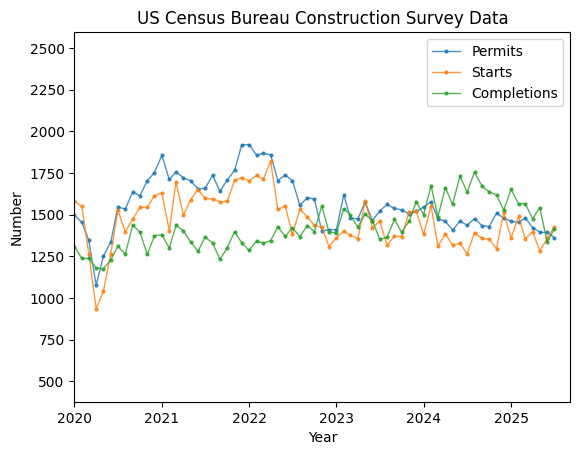

In [9]:
start_date = datetime(2020, 1, 1)
end_date = datetime.now()
line_settings = {'marker': 'o', 'alpha': 0.8, 'linewidth': 1, 'markersize': 2}

df = build.table
dates = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

fig, ax = plt.subplots()
ax.plot(dates, df['Permits'], label='Permits', **line_settings)
ax.plot(dates, df['Starts'], label='Starts', **line_settings)
ax.plot(dates, df['Completions'], label='Completions', **line_settings)

ax.set_xlim(start_date, end_date)
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title('US Census Bureau Construction Survey Data')
ax.legend()

plt.show()

## 4. European Economic Sentiment

The [European Economic Sentiment Indicator (ESI)](https://economy-finance.ec.europa.eu/economic-forecast-and-surveys/business-and-consumer-surveys_en) is a composite measure that tracks economic confidence in the EU and euro area. It's a weighted average of confidence indicators from five key sectors: industry, services, consumers, retail trade, and construction. The ESI is used to gauge overall economic sentiment and its fluctuations, with values above 100 indicating above-average sentiment and values below 100 indicating below-average sentiment. 

#### Getting Data from the European Economic Sentiment Surveys

In [10]:
euro = EuroSurvey.download()

displayMD("EU Economic Sentiment Indicator and Components", bold=True, align='center')
displayMD(euro.table.tail(), bold=True, align='center')

<p style="text-align: center";><b>EU Economic Sentiment Indicator and Components</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>EU.INDU</b></th>
      <th><b>EU.SERV</b></th>
      <th><b>EU.CONS</b></th>
      <th><b>EU.RETA</b></th>
      <th><b>EU.BUIL</b></th>
      <th><b>EU.ESI</b></th>
      <th><b>EU.EEI</b></th>
      <th><b>EA.INDU</b></th>
      <th><b>EA.SERV</b></th>
      <th><b>EA.CONS</b></th>
      <th><b>EA.RETA</b></th>
      <th><b>EA.BUIL</b></th>
      <th><b>EA.ESI</b></th>
      <th><b>EA.EEI</b></th>
      <th><b>BE.INDU</b></th>
      <th><b>BE.SERV</b></th>
      <th><b>BE.CONS</b></th>
      <th><b>BE.RETA</b></th>
      <th><b>BE.BUIL</b></th>
      <th><b>BE.ESI</b></th>
      <th><b>BE.EEI</b></th>
      <th><b>BG.INDU</b></th>
      <th><b>BG.SERV</b></th>
      <th><b>BG.CONS</b></th>
      <th><b>BG.RETA</b></th>
      <th><b>BG.BUIL</b></th>
      <th><b>BG.ESI</b></th>
      <th><b>BG.EEI</b></th>
      <th><b>CZ.INDU</b></th>
      <th><b>CZ.SERV</b></th>
      <th><b>CZ.CONS</b></th>
      <th><b>CZ.RETA</b></th>
      <th><b>CZ.BUIL</b></th>
      <th><b>CZ.ESI</b></th>
      <th><b>CZ.EEI</b></th>
      <th><b>DK.INDU</b></th>
      <th><b>DK.SERV</b></th>
      <th><b>DK.CONS</b></th>
      <th><b>DK.RETA</b></th>
      <th><b>DK.BUIL</b></th>
      <th><b>DK.ESI</b></th>
      <th><b>DK.EEI</b></th>
      <th><b>DE.INDU</b></th>
      <th><b>DE.SERV</b></th>
      <th><b>DE.CONS</b></th>
      <th><b>DE.RETA</b></th>
      <th><b>DE.BUIL</b></th>
      <th><b>DE.ESI</b></th>
      <th><b>DE.EEI</b></th>
      <th><b>EE.INDU</b></th>
      <th><b>EE.SERV</b></th>
      <th><b>EE.CONS</b></th>
      <th><b>EE.RETA</b></th>
      <th><b>EE.BUIL</b></th>
      <th><b>EE.ESI</b></th>
      <th><b>EE.EEI</b></th>
      <th><b>IE.INDU</b></th>
      <th><b>IE.SERV</b></th>
      <th><b>IE.CONS</b></th>
      <th><b>IE.RETA</b></th>
      <th><b>IE.BUIL</b></th>
      <th><b>IE.ESI</b></th>
      <th><b>IE.EEI</b></th>
      <th><b>EL.INDU</b></th>
      <th><b>EL.SERV</b></th>
      <th><b>EL.CONS</b></th>
      <th><b>EL.RETA</b></th>
      <th><b>EL.BUIL</b></th>
      <th><b>EL.ESI</b></th>
      <th><b>EL.EEI</b></th>
      <th><b>ES.INDU</b></th>
      <th><b>ES.SERV</b></th>
      <th><b>ES.CONS</b></th>
      <th><b>ES.RETA</b></th>
      <th><b>ES.BUIL</b></th>
      <th><b>ES.ESI</b></th>
      <th><b>ES.EEI</b></th>
      <th><b>FR.INDU</b></th>
      <th><b>FR.SERV</b></th>
      <th><b>FR.CONS</b></th>
      <th><b>FR.RETA</b></th>
      <th><b>FR.BUIL</b></th>
      <th><b>FR.ESI</b></th>
      <th><b>FR.EEI</b></th>
      <th><b>HR.INDU</b></th>
      <th><b>HR.SERV</b></th>
      <th><b>HR.CONS</b></th>
      <th><b>HR.RETA</b></th>
      <th><b>HR.BUIL</b></th>
      <th><b>HR.ESI</b></th>
      <th><b>HR.EEI</b></th>
      <th><b>IT.INDU</b></th>
      <th><b>IT.SERV</b></th>
      <th><b>IT.CONS</b></th>
      <th><b>IT.RETA</b></th>
      <th><b>IT.BUIL</b></th>
      <th><b>IT.ESI</b></th>
      <th><b>IT.EEI</b></th>
      <th><b>CY.INDU</b></th>
      <th><b>CY.SERV</b></th>
      <th><b>CY.CONS</b></th>
      <th><b>CY.RETA</b></th>
      <th><b>CY.BUIL</b></th>
      <th><b>CY.ESI</b></th>
      <th><b>CY.EEI</b></th>
      <th><b>LV.INDU</b></th>
      <th><b>LV.SERV</b></th>
      <th><b>LV.CONS</b></th>
      <th><b>LV.RETA</b></th>
      <th><b>LV.BUIL</b></th>
      <th><b>LV.ESI</b></th>
      <th><b>LV.EEI</b></th>
      <th><b>LT.INDU</b></th>
      <th><b>LT.SERV</b></th>
      <th><b>LT.CONS</b></th>
      <th><b>LT.RETA</b></th>
      <th><b>LT.BUIL</b></th>
      <th><b>LT.ESI</b></th>
      <th><b>LT.EEI</b></th>
      <th><b>LU.INDU</b></th>
      <th><b>LU.SERV</b></th>
      <th><b>LU.CONS</b></th>
      <th><b>LU.RETA</b></th>
      <th><b>LU.BUIL</b></th>
      <th><b>LU.ESI</b></th>
      <th><b>LU.EEI</b></th>
      <th><b>HU.INDU</b></th>
      <th><b>HU.SERV</b></th>
      <th><b>HU.CONS</b></th>
      <th><b>HU.RETA</b></th>
      <th><b>HU.BUIL</b></th>
      <th><b>HU.ESI</b></th>
      <th><b>HU.EEI</b></th>
      <th><b>MT.INDU</b></th>
      <th><b>MT.SERV</b></th>
      <th><b>MT.CONS</b></th>
      <th><b>MT.RETA</b></th>
      <th><b>MT.BUIL</b></th>
      <th><b>MT.ESI</b></th>
      <th><b>MT.EEI</b></th>
      <th><b>NL.INDU</b></th>
      <th><b>NL.SERV</b></th>
      <th><b>NL.CONS</b></th>
      <th><b>NL.RETA</b></th>
      <th><b>NL.BUIL</b></th>
      <th><b>NL.ESI</b></th>
      <th><b>NL.EEI</b></th>
      <th><b>AT.INDU</b></th>
      <th><b>AT.SERV</b></th>
      <th><b>AT.CONS</b></th>
      <th><b>AT.RETA</b></th>
      <th><b>AT.BUIL</b></th>
      <th><b>AT.ESI</b></th>
      <th><b>AT.EEI</b></th>
      <th><b>PL.INDU</b></th>
      <th><b>PL.SERV</b></th>
      <th><b>PL.CONS</b></th>
      <th><b>PL.RETA</b></th>
      <th><b>PL.BUIL</b></th>
      <th><b>PL.ESI</b></th>
      <th><b>PL.EEI</b></th>
      <th><b>PT.INDU</b></th>
      <th><b>PT.SERV</b></th>
      <th><b>PT.CONS</b></th>
      <th><b>PT.RETA</b></th>
      <th><b>PT.BUIL</b></th>
      <th><b>PT.ESI</b></th>
      <th><b>PT.EEI</b></th>
      <th><b>RO.INDU</b></th>
      <th><b>RO.SERV</b></th>
      <th><b>RO.CONS</b></th>
      <th><b>RO.RETA</b></th>
      <th><b>RO.BUIL</b></th>
      <th><b>RO.ESI</b></th>
      <th><b>RO.EEI</b></th>
      <th><b>SI.INDU</b></th>
      <th><b>SI.SERV</b></th>
      <th><b>SI.CONS</b></th>
      <th><b>SI.RETA</b></th>
      <th><b>SI.BUIL</b></th>
      <th><b>SI.ESI</b></th>
      <th><b>SI.EEI</b></th>
      <th><b>SK.INDU</b></th>
      <th><b>SK.SERV</b></th>
      <th><b>SK.CONS</b></th>
      <th><b>SK.RETA</b></th>
      <th><b>SK.BUIL</b></th>
      <th><b>SK.ESI</b></th>
      <th><b>SK.EEI</b></th>
      <th><b>FI.INDU</b></th>
      <th><b>FI.SERV</b></th>
      <th><b>FI.CONS</b></th>
      <th><b>FI.RETA</b></th>
      <th><b>FI.BUIL</b></th>
      <th><b>FI.ESI</b></th>
      <th><b>FI.EEI</b></th>
      <th><b>SE.INDU</b></th>
      <th><b>SE.SERV</b></th>
      <th><b>SE.CONS</b></th>
      <th><b>SE.RETA</b></th>
      <th><b>SE.BUIL</b></th>
      <th><b>SE.ESI</b></th>
      <th><b>SE.EEI</b></th>
      <th><b>UK.INDU</b></th>
      <th><b>UK.SERV</b></th>
      <th><b>UK.CONS</b></th>
      <th><b>UK.RETA</b></th>
      <th><b>UK.BUIL</b></th>
      <th><b>UK.ESI</b></th>
      <th><b>UK.EEI</b></th>
      <th><b>ME.INDU</b></th>
      <th><b>ME.SERV</b></th>
      <th><b>ME.CONS</b></th>
      <th><b>ME.RETA</b></th>
      <th><b>ME.BUIL</b></th>
      <th><b>ME.ESI</b></th>
      <th><b>ME.EEI</b></th>
      <th><b>MK.INDU</b></th>
      <th><b>MK.SERV</b></th>
      <th><b>MK.CONS</b></th>
      <th><b>MK.RETA</b></th>
      <th><b>MK.BUIL</b></th>
      <th><b>MK.ESI</b></th>
      <th><b>MK.EEI</b></th>
      <th><b>AL.INDU</b></th>
      <th><b>AL.SERV</b></th>
      <th><b>AL.CONS</b></th>
      <th><b>AL.RETA</b></th>
      <th><b>AL.BUIL</b></th>
      <th><b>AL.ESI</b></th>
      <th><b>AL.EEI</b></th>
      <th><b>RS.INDU</b></th>
      <th><b>RS.SERV</b></th>
      <th><b>RS.CONS</b></th>
      <th><b>RS.RETA</b></th>
      <th><b>RS.BUIL</b></th>
      <th><b>RS.ESI</b></th>
      <th><b>RS.EEI</b></th>
      <th><b>TR.INDU</b></th>
      <th><b>TR.SERV</b></th>
      <th><b>TR.CONS</b></th>
      <th><b>TR.RETA</b></th>
      <th><b>TR.BUIL</b></th>
      <th><b>TR.ESI</b></th>
      <th><b>TR.EEI</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025</td>
      <td>4</td>
      <td>-10.3</td>
      <td>3.2</td>
      <td>-15.9</td>
      <td>-7.0</td>
      <td>-5.7</td>
      <td>94.6</td>
      <td>97.0</td>
      <td>-11.0</td>
      <td>1.9</td>
      <td>-16.6</td>
      <td>-8.8</td>
      <td>-3.9</td>
      <td>93.9</td>
      <td>96.6</td>
      <td>-13.9</td>
      <td>-7.9</td>
      <td>-19.5</td>
      <td>-10.7</td>
      <td>-5.8</td>
      <td>87.8</td>
      <td>89.0</td>
      <td>-0.1</td>
      <td>8.7</td>
      <td>-21.3</td>
      <td>14.7</td>
      <td>-4.3</td>
      <td>102.5</td>
      <td>110.1</td>
      <td>-7.5</td>
      <td>30.1</td>
      <td>-13.7</td>
      <td>18.4</td>
      <td>-3.0</td>
      <td>96.9</td>
      <td>93.3</td>
      <td>-3.3</td>
      <td>5.6</td>
      <td>-14.4</td>
      <td>-3.0</td>
      <td>-10.2</td>
      <td>96.7</td>
      <td>103.5</td>
      <td>-19.9</td>
      <td>2.7</td>
      <td>-10.7</td>
      <td>-26.0</td>
      <td>-16.2</td>
      <td>90.0</td>
      <td>91.4</td>
      <td>-9.4</td>
      <td>-3.2</td>
      <td>-36.9</td>
      <td>-19.0</td>
      <td>-18.6</td>
      <td>89.5</td>
      <td>90.8</td>
      <td>4.0</td>
      <td>17.9</td>
      <td>-20.9</td>
      <td>7.1</td>
      <td>21.4</td>
      <td>95.3</td>
      <td>99.5</td>
      <td>6.2</td>
      <td>30.8</td>
      <td>-46.8</td>
      <td>-4.0</td>
      <td>13.7</td>
      <td>107.4</td>
      <td>120.4</td>
      <td>-4.3</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>12.4</td>
      <td>103.8</td>
      <td>108.2</td>
      <td>-6.5</td>
      <td>-2.8</td>
      <td>-16.6</td>
      <td>-14.4</td>
      <td>-14.0</td>
      <td>96.6</td>
      <td>93.1</td>
      <td>1.3</td>
      <td>16.2</td>
      <td>-14.1</td>
      <td>1.8</td>
      <td>16.3</td>
      <td>103.4</td>
      <td>111.3</td>
      <td>-8.9</td>
      <td>-1.1</td>
      <td>-19.2</td>
      <td>9.3</td>
      <td>2.3</td>
      <td>95.9</td>
      <td>103.9</td>
      <td>0.0</td>
      <td>21.5</td>
      <td>-17.1</td>
      <td>2.5</td>
      <td>6.8</td>
      <td>106.3</td>
      <td>106.0</td>
      <td>-5.3</td>
      <td>2.7</td>
      <td>-15.5</td>
      <td>2.9</td>
      <td>-10.9</td>
      <td>98.0</td>
      <td>99.7</td>
      <td>-7.2</td>
      <td>4.7</td>
      <td>-0.2</td>
      <td>3.4</td>
      <td>-12.8</td>
      <td>101.8</td>
      <td>103.8</td>
      <td>-8.7</td>
      <td>&lt;NA&gt;</td>
      <td>-15.9</td>
      <td>&lt;NA&gt;</td>
      <td>-23.7</td>
      <td>98.6</td>
      <td>&lt;NA&gt;</td>
      <td>-10.4</td>
      <td>-13.8</td>
      <td>-27.5</td>
      <td>-20.7</td>
      <td>-25.4</td>
      <td>93.5</td>
      <td>99.6</td>
      <td>18.2</td>
      <td>9.2</td>
      <td>-3.5</td>
      <td>-7.1</td>
      <td>24.4</td>
      <td>108.1</td>
      <td>96.9</td>
      <td>-2.8</td>
      <td>4.5</td>
      <td>-19.3</td>
      <td>2.2</td>
      <td>19.4</td>
      <td>97.8</td>
      <td>101.8</td>
      <td>-14.3</td>
      <td>0.8</td>
      <td>-21.3</td>
      <td>-3.7</td>
      <td>-18.2</td>
      <td>89.1</td>
      <td>97.6</td>
      <td>-15.8</td>
      <td>-3.5</td>
      <td>1.1</td>
      <td>-2.7</td>
      <td>-17.6</td>
      <td>101.0</td>
      <td>102.2</td>
      <td>-4.6</td>
      <td>3.0</td>
      <td>-20.3</td>
      <td>2.0</td>
      <td>2.6</td>
      <td>101.6</td>
      <td>107.3</td>
      <td>-1.4</td>
      <td>3.4</td>
      <td>-18.5</td>
      <td>8.7</td>
      <td>-7.6</td>
      <td>100.4</td>
      <td>103.0</td>
      <td>-6.8</td>
      <td>18.7</td>
      <td>-29.2</td>
      <td>4.3</td>
      <td>10.9</td>
      <td>97.8</td>
      <td>105.8</td>
      <td>-5.8</td>
      <td>5.9</td>
      <td>-23.0</td>
      <td>7.2</td>
      <td>-8.6</td>
      <td>93.3</td>
      <td>106.5</td>
      <td>-8.9</td>
      <td>0.5</td>
      <td>-7.6</td>
      <td>9.9</td>
      <td>-29.6</td>
      <td>93.2</td>
      <td>95.7</td>
      <td>-3.4</td>
      <td>15.5</td>
      <td>-13.8</td>
      <td>15.9</td>
      <td>-13.7</td>
      <td>93.0</td>
      <td>99.3</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>7.1</td>
      <td>12.9</td>
      <td>-4.3</td>
      <td>8.5</td>
      <td>9.1</td>
      <td>106.5</td>
      <td>117.7</td>
      <td>-10.1</td>
      <td>12.0</td>
      <td>-3.7</td>
      <td>9.8</td>
      <td>-7.6</td>
      <td>98.0</td>
      <td>114.7</td>
      <td>2.1</td>
      <td>23.6</td>
      <td>-11.4</td>
      <td>13.5</td>
      <td>1.0</td>
      <td>104.4</td>
      <td>118.2</td>
      <td>-2.8</td>
      <td>0.9</td>
      <td>-3.9</td>
      <td>8.1</td>
      <td>-8.0</td>
      <td>92.7</td>
      <td>98.4</td>
      <td>-0.9</td>
      <td>17.3</td>
      <td>-16.5</td>
      <td>10.7</td>
      <td>-14.6</td>
      <td>95.9</td>
      <td>94.8</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>-10.3</td>
      <td>3.0</td>
      <td>-14.5</td>
      <td>-5.7</td>
      <td>-5.2</td>
      <td>95.2</td>
      <td>97.5</td>
      <td>-10.3</td>
      <td>1.9</td>
      <td>-15.1</td>
      <td>-7.1</td>
      <td>-3.4</td>
      <td>94.9</td>
      <td>97.1</td>
      <td>-11.1</td>
      <td>-0.3</td>
      <td>-14.4</td>
      <td>-0.3</td>
      <td>-8.4</td>
      <td>95.7</td>
      <td>91.7</td>
      <td>0.5</td>
      <td>8.4</td>
      <td>-19.6</td>
      <td>14.8</td>
      <td>-2.4</td>
      <td>103.4</td>
      <td>110.2</td>
      <td>-4.6</td>
      <td>37.8</td>
      <td>-8.7</td>
      <td>16.5</td>
      <td>-3.6</td>
      <td>102.2</td>
      <td>99.8</td>
      <td>-8.8</td>
      <td>5.6</td>
      <td>-14.4</td>
      <td>1.4</td>
      <td>-10.8</td>
      <td>92.9</td>
      <td>103.9</td>
      <td>-17.8</td>
      <td>2.0</td>
      <td>-8.7</td>
      <td>-19.9</td>
      <td>-16.2</td>
      <td>91.5</td>
      <td>94.1</td>
      <td>-11.1</td>
      <td>-5.8</td>
      <td>-36.1</td>
      <td>-14.9</td>
      <td>-18.6</td>
      <td>88.0</td>
      <td>88.8</td>
      <td>10.4</td>
      <td>18.5</td>
      <td>-16.9</td>
      <td>3.2</td>
      <td>22.7</td>
      <td>98.4</td>
      <td>97.1</td>
      <td>5.1</td>
      <td>29.4</td>
      <td>-42.7</td>
      <td>-2.5</td>
      <td>16.3</td>
      <td>107.1</td>
      <td>116.5</td>
      <td>-5.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>18.2</td>
      <td>103.4</td>
      <td>106.8</td>
      <td>-10.6</td>
      <td>-6.3</td>
      <td>-17.6</td>
      <td>-13.3</td>
      <td>-12.1</td>
      <td>93.0</td>
      <td>91.1</td>
      <td>2.2</td>
      <td>16.8</td>
      <td>-13.6</td>
      <td>0.4</td>
      <td>17.2</td>
      <td>104.2</td>
      <td>109.5</td>
      <td>-8.2</td>
      <td>1.8</td>
      <td>-16.2</td>
      <td>9.7</td>
      <td>2.3</td>
      <td>98.7</td>
      <td>104.3</td>
      <td>0.9</td>
      <td>15.2</td>
      <td>-15.8</td>
      <td>3.3</td>
      <td>5.3</td>
      <td>106.1</td>
      <td>109.9</td>
      <td>-3.9</td>
      <td>1.5</td>
      <td>-15.5</td>
      <td>1.3</td>
      <td>-8.0</td>
      <td>98.5</td>
      <td>101.1</td>
      <td>-8.2</td>
      <td>5.4</td>
      <td>0.4</td>
      <td>3.1</td>
      <td>-9.7</td>
      <td>101.3</td>
      <td>103.4</td>
      <td>-6.7</td>
      <td>&lt;NA&gt;</td>
      <td>-6.9</td>
      <td>&lt;NA&gt;</td>
      <td>-24.4</td>
      <td>104.3</td>
      <td>&lt;NA&gt;</td>
      <td>-13.6</td>
      <td>-15.3</td>
      <td>-28.0</td>
      <td>-24.5</td>
      <td>-27.6</td>
      <td>91.6</td>
      <td>97.7</td>
      <td>-17.0</td>
      <td>20.8</td>
      <td>-0.3</td>
      <td>9.6</td>
      <td>16.8</td>
      <td>97.6</td>
      <td>102.0</td>
      <td>-3.4</td>
      <td>4.1</td>
      <td>-17.6</td>
      <td>0.6</td>
      <td>16.7</td>
      <td>97.0</td>
      <td>101.9</td>
      <td>-13.3</td>
      <td>6.8</td>
      <td>-18.5</td>
      <td>-5.1</td>
      <td>-19.3</td>
      <td>91.7</td>
      <td>90.5</td>
      <td>-16.0</td>
      <td>-4.1</td>
      <td>1.8</td>
      <td>-2.2</td>
      <td>-18.0</td>
      <td>100.4</td>
      <td>102.4</td>
      <td>-4.5</td>
      <td>12.2</td>
      <td>-15.9</td>
      <td>1.9</td>
      <td>4.0</td>
      <td>105.9</td>
      <td>105.4</td>
      <td>-2.0</td>
      <td>3.2</td>
      <td>-15.8</td>
      <td>-0.7</td>
      <td>-8.6</td>
      <td>99.0</td>
      <td>105.3</td>
      <td>-8.0</td>
      <td>17.2</td>
      <td>-24.8</td>
      <td>9.0</td>
      <td>5.9</td>
      <td>98.4</td>
      <td>104.6</td>
      <td>-5.8</td>
      <td>-3.0</td>
      <td>-22.2</td>
      <td>7.1</td>
      <td>-9.4</td>
      <td>91.3</td>
      <td>107.5</td>
      <td>-8.9</td>
      <td>2.7</td>
      <td>-8.3</td>
      <td>10.5</td>
      <td>-30.7</td>
      <td>92.6</td>
      <td>97.3</td>
      <td>-2.0</td>
      <td>14.2</td>
      <td>-10.4</td>
      <td>18.2</td>
      <td>-10.1</td>
      <td>95.2</td>
      <td>99.9</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>4.3</td>
      <td>8.8</td>
      <td>-1.9</td>
      <td>9.4</td>
      <td>11.7</td>
      <td>104.2</td>
      <td>114.5</td>
      <td>-9.5</td>
      <td>14.4</td>
      <td>-2.6</td>
      <td>5.3</td>
      <td>-6.7</td>
      <td>100.2</td>
      <td>112.4</td>
      <td>4.6</td>
      <td>29.9</td>
      <td>-10.6</td>
      <td>13.9</td>
      <td>-3.6</td>
      <td>107.7</td>
      <td>118.6</td>
      <td>-2.9</td>
      <td>-4.2</td>
      <td>-4.8</td>
      <td>10.0</td>
      <td>-5.5</td>
      <td>90.7</td>
      <td>97.8</td>
      <td>-2.5</td>
      <td>18.5</td>
      <td>-15.5</td>
      <td>12.2</td>
      <td>-11.8</td>
      <td>96.2</td>
      <td>93.6</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>-11.3</td>
      <td>3.4</td>
      <td>-14.8</td>
      <td>-6.3</td>
      <td>-4.7</td>
      <td>94.2</td>
      <td>97.7</td>
      <td>-11.8</td>
      <td>3.0</td>
      <td>-15.3</td>
      <td>-7.6</td>
      <td>-2.9</td>
      <td>94.1</td>
      <td>97.2</td>
      <td>-9.3</td>
      <td>3.4</td>
      <td>-12.8</td>
      <td>-7.8</td>
      <td>-7.6</td>
      <td>97.6</td>
      <td>94.8</td>
      <td>-0.3</td>
      <td>11.2</td>
      <td>-20.0</td>
      <td>16.5</td>
      <td>2.6</td>
      <td>104.0</td>
      <td>113.4</td>
      <td>-7.5</td>
      <td>36.5</td>
      <td>-8.7</td>
      <td>9.6</td>
      <td>0.9</td>
      <td>99.1</td>
      <td>100.5</td>
      <td>-11.1</td>
      <td>6.2</td>
      <td>-13.4</td>
      <td>-0.2</td>
      <td>-9.4</td>
      <td>92.5</td>
      <td>102.4</td>
      <td>-20.9</td>
      <td>4.0</td>
      <td>-8.8</td>
      <td>-21.4</td>
      <td>-13.9</td>
      <td>90.8</td>
      <td>91.3</td>
      <td>-12.7</td>
      <td>-9.8</td>
      <td>-35.6</td>
      <td>-13.8</td>
      <td>-18.5</td>
      <td>87.3</td>
      <td>89.8</td>
      <td>9.9</td>
      <td>18.2</td>
      <td>-13.4</td>
      <td>2.5</td>
      <td>18.5</td>
      <td>98.7</td>
      <td>92.2</td>
      <td>3.2</td>
      <td>29.2</td>
      <td>-46.9</td>
      <td>12.7</td>
      <td>22.0</td>
      <td>106.1</td>
      <td>113.6</td>
      <td>-6.2</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>16.6</td>
      <td>102.1</td>
      <td>108.8</td>
      <td>-12.7</td>
      <td>-7.3</td>
      <td>-17.5</td>
      <td>-14.7</td>
      <td>-12.2</td>
      <td>89.7</td>
      <td>93.0</td>
      <td>1.5</td>
      <td>14.4</td>
      <td>-11.4</td>
      <td>-4.6</td>
      <td>13.4</td>
      <td>104.5</td>
      <td>98.7</td>
      <td>-7.5</td>
      <td>2.5</td>
      <td>-17.3</td>
      <td>8.7</td>
      <td>3.5</td>
      <td>99.0</td>
      <td>107.5</td>
      <td>-0.5</td>
      <td>14.3</td>
      <td>-14.8</td>
      <td>-2.1</td>
      <td>7.8</td>
      <td>104.7</td>
      <td>106.8</td>
      <td>-3.7</td>
      <td>0.9</td>
      <td>-11.1</td>
      <td>0.9</td>
      <td>-8.7</td>
      <td>99.1</td>
      <td>99.9</td>
      <td>-8.2</td>
      <td>7.5</td>
      <td>0.3</td>
      <td>1.5</td>
      <td>-10.9</td>
      <td>101.7</td>
      <td>102.3</td>
      <td>-16.4</td>
      <td>&lt;NA&gt;</td>
      <td>-11.9</td>
      <td>&lt;NA&gt;</td>
      <td>-21.4</td>
      <td>96.2</td>
      <td>&lt;NA&gt;</td>
      <td>-11.0</td>
      <td>-17.6</td>
      <td>-29.5</td>
      <td>-23.4</td>
      <td>-30.9</td>
      <td>93.1</td>
      <td>96.8</td>
      <td>8.6</td>
      <td>6.2</td>
      <td>-0.3</td>
      <td>9.1</td>
      <td>46.5</td>
      <td>106.7</td>
      <td>108.5</td>
      <td>-4.3</td>
      <td>5.3</td>
      <td>-16.1</td>
      <td>2.7</td>
      <td>17.5</td>
      <td>97.3</td>
      <td>104.9</td>
      <td>-15.8</td>
      <td>5.0</td>
      <td>-18.4</td>
      <td>-3.2</td>
      <td>-18.9</td>
      <td>90.4</td>
      <td>92.4</td>
      <td>-15.5</td>
      <td>-3.4</td>
      <td>2.8</td>
      <td>-1.8</td>
      <td>-18.7</td>
      <td>101.3</td>
      <td>103.1</td>
      <td>-3.3</td>
      <td>14.4</td>
      <td>-16.1</td>
      <td>2.8</td>
      <td>4.9</td>
      <td>107.4</td>
      <td>106.5</td>
      <td>-1.6</td>
      <td>3.3</td>
      <td>-25.1</td>
      <td>-1.7</td>
      <td>-8.9</td>
      <td>96.7</td>
      <td>103.9</td>
      <td>-9.9</td>
      <td>15.4</td>
      <td>-25.8</td>
      <td>-1.8</td>
      <td>3.6</td>
      <td>95.7</td>
      <td>104.5</td>
      <td>-6.7</td>
      <td>-0.1</td>
      <td>-21.3</td>
      <td>8.4</td>
      <td>-2.3</td>
      <td>92.9</td>
      <td>107.5</td>
      <td>-8.7</td>
      <td>5.4</td>
      <td>-8.2</td>
      <td>3.6</td>
      <td>-32.1</td>
      <td>93.6</td>
      <td>95.1</td>
      <td>-3.2</td>
      <td>11.8</td>
      <td>-8.0</td>
      <td>13.1</td>
      <td>-11.7</td>
      <td>94.4</td>
      <td>99.4</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>5.9</td>
      <td>9.3</td>
      <td>-0.6</td>
      <td>6.9</td>
      <td>6.5</td>
      <td>106.9</td>
      <td>108.7</td>
      <td>-10.5</td>
      <td>13.4</td>
      <td>0.0</td>
      <td>10.5</td>
      <td>-9.8</td>
      <td>98.4</td>
      <td>114.8</td>
      <td>3.6</td>
      <td>25.3</td>
      <td>-10.2</td>
      <td>11.1</td>
      <td>-3.8</td>
      <td>105.0</td>
      <td>109.3</td>
      <td>-5.8</td>
      <td>-4.7</td>
      <td>-3.2</td>
      <td>8.7</td>
      <td>-6.3</td>
      <td>88.1</td>
      <td>92.7</td>
      <td>-2.1</td>
      <td>19.4</td>
      <td>-15.2</td>
      <td>9.8</td>
      <td>-13.3</td>
      <td>96.8</td>
      <td>92.6</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>7</td>
      <td>-10.4</td>
      <td>4.1</td>
      <td>-14.5</td>
      <td>-5.5</td>
      <td>-5.4</td>
      <td>95.2</td>
      <td>97.5</td>
      <td>-10.5</td>
      <td>4.1</td>
      <td>-14.7</td>
      <td>-6.6</td>
      <td>-3.1</td>
      <td>95.7</td>
      <td>97.5</td>
      <td>-13.7</td>
      <td>2.9</td>
      <td>-12.0</td>
      <td>-3.3</td>
      <td>-7.1</td>
      <td>95.2</td>
      <td>94.8</td>
      <td>-1.5</td>
      <td>11.1</td>
      <td>-19.8</td>
      <td>14.0</td>
      <td>5.2</td>
      <td>103.2</td>
      <td>109.9</td>
      <td>-9.6</td>
      <td>33.1</td>
      <td>-6.3</td>
      <td>14.4</td>
      <td>0.2</td>
      <td>97.2</td>
      <td>97.1</td>
      <td>-14.2</td>
      <td>7.6</td>
      <td>-12.8</td>
      <td>-1.5</td>
      <td>-11.6</td>
      <td>90.9</td>
      <td>103.8</td>
      <td>-18.4</td>
      <td>4.1</td>
      <td>-8.4</td>
      <td>-23.1</td>
      <td>-13.2</td>
      <td>91.9</td>
      <td>92.2</td>
      <td>-11.1</td>
      <td>-5.6</td>
      <td>-38.8</td>
      <td>-12.1</td>
      <td>-10.5</td>
      <td>87.9</td>
      <td>92.8</td>
      <td>5.9</td>
      <td>26.2</td>
      <td>-17.7</td>
      <td>12.4</td>
      <td>23.6</td>
      <td>100.0</td>
      <td>89.2</td>
      <td>9.7</td>
      <td>30.1</td>
      <td>-47.6</td>
      <td>0.0</td>
      <td>18.3</td>
      <td>109.1</td>
      <td>115.5</td>
      <td>-4.5</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>18.4</td>
      <td>104.3</td>
      <td>108.8</td>
      <td>-12.0</td>
      <td>-4.7</td>
      <td>-16.8</td>
      <td>-11.2</td>
      <td>-14.2</td>
      <td>91.9</td>
      <td>93.0</td>
      <td>2.1</td>
      <td>6.6</td>
      <td>-11.5</td>
      <td>4.0</td>
      <td>16.4</td>
      <td>103.4</td>
      <td>105.8</td>
      <td>-7.1</td>
      <td>1.0</td>
      <td>-17.0</td>
      <td>12.0</td>
      <td>3.5</td>
      <td>99.4</td>
      <td>105.4</td>
      <td>1.9</td>
      <td>18.9</td>
      <td>-19.1</td>
      <td>0.7</td>
      <td>13.7</td>
      <td>106.4</td>
      <td>109.6</td>
      <td>-3.3</td>
      <td>0.1</td>
      <td>-9.3</td>
      <td>1.7</td>
      <td>-9.3</td>
      <td>99.5</td>
      <td>98.1</td>
      <td>-7.3</td>
      <td>4.8</td>
      <td>0.0</td>
      <td>1.1</td>
      <td>-13.0</td>
      <td>101.6</td>
      <td>102.6</td>
      <td>-14.6</td>
      <td>&lt;NA&gt;</td>
      <td>-9.4</td>
      <td>&lt;NA&gt;</td>
      <td>-22.5</td>
      <td>98.9</td>
      <td>&lt;NA&gt;</td>
      <td>-14.6</td>
      <td>-16.9</td>
      <td>-29.1</td>
      <td>-23.7</td>
      <td>-29.8</td>
      <td>89.8</td>
      <td>94.4</td>
      <td>-5.8</td>
      <td>1.4</td>
      <td>2.9</td>
      <td>-7.1</td>
      <td>-4.0</td>
      <td>97.3</td>
      <td>97.5</td>
      <td>-4.8</td>
      <td>6.1</td>
      <td>-14.2</td>
      <td>1.5</td>
      <td>18.9</td>
      <td>97.2</td>
      <td>102.1</td>
      <td>-14.4</td>
      <td>9.6</td>
      <td>-17.0</td>
      <td>-1.4</td>
      <td>-16.5</td>
      <td>92.6</td>
      <td>96.1</td>
      <td>-16.0</td>
      <td>-3.6</td>
      <td>-2.5</td>
      <td>-2.4</td>
      <td>-17.9</td>
      <td>99.3</td>
      <td>102.3</td>
      <td>-3.1</td>
      <td>11.8</td>
      <td>-15.0</td>
      <td>3.8</td>
      <td>3.3</td>
      <td>106.7</td>
      <td>107.3</td>
      <td>-2.0</td>
      <td>2.3</td>
      <td>-31.5</td>
      <td>-5.4</td>
      <td>-9.3</td>
      <td>94.6</td>
      <td>100.2</td>
      <td>-6.9</td>
      <td>15.2</td>
      <td>-28.1</td>
      <td>3.9</td>
      <td>5.8</td>
      <td>96.9</td>
      <td>102.9</td>
      <td>-2.6</td>
      <td>0.3</td>
      <td>-19.8</td>
      <td>9.9</td>
      <td>-6.1</td>
      <td>95.1</td>
      <td>104.4</td>
      <td>-4.9</td>
      <td>4.2</td>
      <td>-6.6</td>
      <td>0.7</td>
      <td>-36.3</td>
      <td>95.4</td>
      <td>96.2</td>
      <td>-6.9</td>
      <td>18.5</td>
      <td>-5.7</td>
      <td>17.6</td>
      <td>-19.0</td>
      <td>95.1</td>
      <td>97.3</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>6.0</td>
      <td>10.8</td>
      <td>-4.0</td>
      <td>5.7</td>
      <td>5.3</td>
      <td>105.0</td>
      <td>110.2</td>
      <td>-9.3</td>
      <td>10.8</td>
      <td>0.9</td>
      <td>12.4</td>
      <td>-6.0</td>
      <td>99.9</td>
      <td>116.2</td>
      <td>3.9</td>
      <td>30.6</td>
      <td>-11.1</td>
      <td>10.7</td>
      <td>-5.3</td>
      <td>104.4</td>
      <td>119.2</td>
      <td>-5.3</td>
      <td>-3.6</td>
      <td>-6.3</td>
      <td>10.5</td>
      <td>-7.4</td>
      <td>88.0</td>
      <td>97.4</td>
      <td>-1.7</td>
      <td>18.6</td>
      <td>-17.1</td>
      <td>10.4</td>
      <td>-11.8</td>
      <td>96.5</td>
      <td>92.6</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>8</td>
      <td>-10.6</td>
      <td>3.8</td>
      <td>-14.8</td>
      <td>-5.3</td>
      <td>-5.7</td>
      <td>94.9</td>
      <td>98.1</td>
      <td>-10.3</td>
      <td>3.6</td>
      <td>-15.5</td>
      <td>-6.5</td>
      <td>-3.5</td>
      <td>95.2</td>
      <td>97.8</td>
      <td>-11.4</td>
      <td>-2.3</td>
      <td>-12.6</td>
      <td>-5.2</td>
      <td>-9.0</td>
      <td>94.7</td>
      <td>92.0</td>
      <td>-1.1</td>
      <td>12.4</td>
      <td>-21.4</td>
      <td>11.6</td>
      <td>5.9</td>
      <td>103.4</td>
      <td>112.2</td>
      <td>-5.4</td>
      <td>39.7</td>
      <td>-9.2</td>
      <td>12.5</td>
      <td>1.8</td>
      <td>102.5</td>
      <td>99.7</td>
      <td>-14.4</td>
      <td>6.9</td>
      <td>-14.0</td>
      <td>-3.0</td>
      <td>-10.1</td>
      <td>89.6</td>
      <td>105.1</td>
      <td>-19.7</td>
      <td>4.5</td>
      <td>-10.6</td>
      <td>-21.9</td>
      <td>-13.0</td>
      <td>90.9</td>
      <td>92.9</td>
      <td>-12.5</td>
      <td>-1.2</td>
      <td>-37.1</td>
      <td>-15.4</td>
      <td>-13.3</td>
      <td>88.4</td>
      <td>94.9</td>
      <td>9.8</td>
      <td>15.7</td>
      <td>-16.3</td>
      <td>10.0</td>
      <td>13.4</td>
      <td>97.1</td>
      <td>86.0</td>
      <td>11.0</td>
      <td>29.8</td>
      <td>-48.8</td>
      <td>-2.9</td>
      <td>25.7</td>
      <td>110.0</td>
      <td>114.4</td>
      <td>-5.8</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>8.8</td>
      <td>101.7</td>
      <td>105.8</td>
      <td>-11.0</td>
      <td>-7.3</td>
      <td>-18.5</td>
      <td>-10.9</td>
      <td>-13.4</td>
      <td>92.0</td>
      <td>93.5</td>
      <td>-0.3</td>
      <td>20.6</td>
      <td>-11.8</td>
      <td>3.6</td>
      <td>13.5</td>
      <td>105.3</td>
      <td>105.3</td>
      <td>-7.7</td>
      <td>2.3</td>
      <td>-16.8</td>
      <td>9.3</td>
      <td>1.0</td>
      <td>98.4</td>
      <td>104.5</td>
      <td>2.7</td>
      <td>9.2</td>
      <td>-13.3</td>
      <td>6.3</td>
      <td>8.5</td>
      <td>105.5</td>
      <td>103.7</td>
      <td>-5.1</td>
      <td>0.3</td>
      <td>-14.6</td>
      <td>3.2</td>
      <td>-9.8</td>
      <td>97.2</td>
      <td>98.1</td>
      <td>-7.1</td>
      <td>9.7</td>
      <td>1.7</td>
      <td>2.3</td>
      <td>-14.8</td>
      <td>103.4</td>
      <td>102.1</td>
      <td>-28.7</td>
      <td>&lt;NA&gt;</td>
      <td>-9.0</td>
      <td>&lt;NA&gt;</td>
      <td>-19.0</td>
      <td>93.7</td>
      <td>&lt;NA&gt;</td>
      <td>-11.3</td>
      <td>-18.3</td>
      <td>-27.0</td>
      <td>-20.9</td>
      <td>-26.8</td>
      <td>91.6</td>
      <td>97.4</td>
      <td>-6.0</td>
      <td>26.1</td>
      <td>1.9</td>
      <td>4.4</td>
      <td>-10.4</td>
      <td>103.5</td>
      <td>96.5</td>
      <td>-2.6</td>
      <td>7.4</td>
      <td>-14.6</td>
      <td>7.2</td>
      <td>17.2</td>
      <td>100.7</td>
      <td>102.4</td>
      <td>-15.2</td>
      <td>5.7</td>
      <td>-14.0</td>
      <td>-3.8</td>
      <td>-18.0</td>
      <td>93.2</td>
      <td>95.5</td>
      <td>-16.7</td>
      <td>-2.9</td>
      <td>1.3</td>
      <td>-2.5</td>
      <td>-18.6</td>
      <td>99.8</td>
      <td>101.9</td>
      <td>-3.1</td>
      <td>13.1</td>
      <td>-17.4</td>
      <td>3.4</td>
      <td>2.6</td>
      <td>107.0</td>
      <td>104.6</td>
      <td>-2.0</td>
      <td>0.8</td>
      <td>-31.5</td>
      <td>-2.3</td>
      <td>-9.3</td>
      <td>94.4</td>
      <td>100.0</td>
      <td>-5.6</td>
      <td>16.2</td>
      <td>-27.1</td>
      <td>-2.6</td>
      <td>3.4</td>
      <td>98.4</td>
      <td>104.6</td>
      <td>4.3</td>
      <td>2.4</td>
      <td>-20.5</td>
      <td>8.3</td>
      <td>-6.8</td>
      <td>98.4</td>
      <td>107.9</td>
      <td>-2.1</td>
      <td>6.3</td>
      <td>-7.8</td>
      <td>2.3</td>
      <td>-26.5</td>
      <td>97.1</td>
      <td>97.4</td>
      <td>-3.9</td>
      <td>17.2</td>
      <td>-6.6</td>
      <td>19.9</td>
      <td>-12.2</td>
      <td>96.6</td>
      <td>99.1</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>7.5</td>
      <td>10.2</td>
      <td>-6.0</td>
      <td>2.7</td>
      <td>2.9</td>
      <td>106.0</td>
      <td>109.2</td>
      <td>-11.5</td>
      <td>15.7</td>
      <td>-1.0</td>
      <td>14.0</td>
      <td>-8.3</td>
      <td>98.9</td>
      <td>125.9</td>
      <td>5.2</td>
      <td>30.2</td>
      <td>-11.4</td>
      <td>11.8</td>
      <td>-4.0</td>
      <td>107.0</td>
      <td>106.1</td>
      <td>-0.8</td>
      <td>-0.8</td>
      <td>-5.2</td>
      <td>5.6</td>
      <td>-10.6</td>
      <td>93.4</td>
      <td>96.3</td>
      <td>-1.4</td>
      <td>19.8</td>
      <td>-16.2</td>
      <td>11.0</td>
      <td>-15.1</td>
      <td>98.1</td>
      <td>94.7</td>
    </tr>
  </tbody>
</table></div>

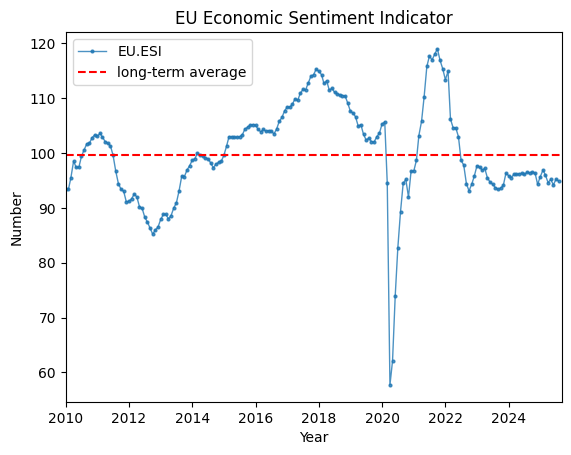

In [11]:
region = 'EU'
sector = 'ESI'
start_date = datetime(2010, 1, 1)
end_date = datetime.now()
line_settings = {'marker': 'o', 'alpha': 0.8, 'linewidth': 1, 'markersize': 2}

df = euro.table
df = df[['Year', 'Month', f'{region}.{sector}']].dropna()
dates = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
series = df[f'{region}.{sector}']

fig, ax = plt.subplots()
ax.plot(dates, series, label=f'{region}.{sector}', **line_settings)
ax.hlines(series.mean(), start_date, end_date, label='long-term average', colors='r', linestyles='dashed')

ax.set_xlim(start_date, end_date)
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title(f'EU Economic Sentiment Indicator')
ax.legend()

plt.show()

## 5. Caixin Manufacturing and Services PMI

The Caixin PMI (Purchasing Managers' Index) is a monthly indicator of the economic health of China's [manufacturing](https://tradingeconomics.com/china/manufacturing-pmi) and [services](https://tradingeconomics.com/china/services-pmi) sectors, specifically focusing on the private sector. Readings above 50 indicate expansion, while those below 50 suggest contraction. The Caixin PMI is closely watched by policymakers and traders as it provides early insights into the performance of Chinese businesses. 

#### Getting Data from the Caixin Manufacturing and Services PMI

In [12]:
caixin = CaixinPmi.download()

joint_table = caixin.table
displayMD("Caixin PMI", bold=True, align='center')
displayMD(joint_table, bold=True, align='center')

<p style="text-align: center";><b>Caixin PMI</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>Manufacturing PMI</b></th>
      <th><b>Services PMI</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>50.4</td>
      <td>50.6</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>7</td>
      <td>49.5</td>
      <td>52.6</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>8</td>
      <td>50.5</td>
      <td>53.0</td>
    </tr>
  </tbody>
</table></div>

## 6. Market Data Snapshot from Trading Economics

[Trading Economics](https://tradingeconomics.com/commodities) provides a wealth of data related to the global economy in powerful formats. The classes and functions used below are written for the convenience of carrying out custom computations/visualizations with the data.

#### Getting Market Data from Trading Economics

The TradingEconomics class has five subclasses: commodities, stock indices, bonds, currencies, and crypto assets. Each of the subclasses have a few DataFrames as attributes which show different segments of data for that asset class.<br><br>To instantiate each of these subclasses, the relevant download method from the parent class (TradingEconomics) is used.

In [13]:
commodities = TradingEconomics.download_commodities() # other methods include download_stocks(), download_bonds(), download_currencies(), download_crypto()

<br> After instantiation of a subclass, the various tables (DataFrames) can be accessed using dot notation as shown below.

In [14]:
energy_table = commodities.energy
energy_table = energy_table.set_index(energy_table.columns[0])
displayMD("Commodities - Energy", bold=True, align='center')
displayMD(energy_table, index=True, bold=True, align='center')

metals_table = commodities.metals
metals_table = metals_table.set_index(metals_table.columns[0])
displayMD("Commodities - Metals", bold=True, align='center')
displayMD(metals_table, index=True, bold=True, align='center')

# Use .table to get all data combined into one table, e.g., commodities.table

<p style="text-align: center";><b>Commodities - Energy</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Unit</b></th>
      <th><b>Price</b></th>
      <th><b>Day %</b></th>
      <th><b>Weekly %</b></th>
      <th><b>Monthly %</b></th>
      <th><b>YTD %</b></th>
      <th><b>YoY %</b></th>
      <th><b>Date</b></th>
    </tr>
    <tr>
      <th><b>Energy</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Crude Oil</b></th>
      <td>USD/Bbl</td>
      <td>61.97</td>
      <td>-2.38</td>
      <td>-3.19</td>
      <td>-3.7</td>
      <td>-13.59</td>
      <td>-8.42</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Brent</b></th>
      <td>USD/Bbl</td>
      <td>65.58</td>
      <td>-2.1</td>
      <td>-2.82</td>
      <td>-1.96</td>
      <td>-12.14</td>
      <td>-7.71</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Natural gas</b></th>
      <td>USD/MMBtu</td>
      <td>3.026</td>
      <td>-1.56</td>
      <td>0.97</td>
      <td>-1.66</td>
      <td>-16.71</td>
      <td>33.01</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Gasoline</b></th>
      <td>USD/Gal</td>
      <td>1.9666</td>
      <td>-1.8</td>
      <td>-0.03</td>
      <td>-5.82</td>
      <td>-2.28</td>
      <td>3.53</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Heating Oil</b></th>
      <td>USD/Gal</td>
      <td>2.2904</td>
      <td>-1.73</td>
      <td>0.91</td>
      <td>1.22</td>
      <td>-1.16</td>
      <td>7.8</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Coal</b></th>
      <td>USD/T</td>
      <td>107.55</td>
      <td>0.51</td>
      <td>-1.87</td>
      <td>-6.07</td>
      <td>-14.13</td>
      <td>-23.99</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>TTF Gas</b></th>
      <td>EUR/MWh</td>
      <td>32.06</td>
      <td>-1.09</td>
      <td>1.39</td>
      <td>-3.6</td>
      <td>-36.46</td>
      <td>-11.84</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>UK Gas</b></th>
      <td>GBp/thm</td>
      <td>78.2919</td>
      <td>-1.05</td>
      <td>0.59</td>
      <td>-4.65</td>
      <td>-37.56</td>
      <td>-11.16</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Ethanol</b></th>
      <td>USD/Gal</td>
      <td>1.965</td>
      <td>-0.76</td>
      <td>0.64</td>
      <td>10.7</td>
      <td>16.27</td>
      <td>8.86</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Naphtha</b></th>
      <td>USD/T</td>
      <td>552.65</td>
      <td>-2.06</td>
      <td>-1.21</td>
      <td>-0.58</td>
      <td>-9.62</td>
      <td>-10.96</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Uranium</b></th>
      <td>USD/Lbs</td>
      <td>76.2</td>
      <td>-0.65</td>
      <td>-0.59</td>
      <td>5.32</td>
      <td>4.38</td>
      <td>-4.69</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Propane</b></th>
      <td>USD/Gal</td>
      <td>0.7</td>
      <td>-1.65</td>
      <td>1.34</td>
      <td>2.43</td>
      <td>-10.4</td>
      <td>4.47</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Methanol</b></th>
      <td>CNY/T</td>
      <td>2260.0</td>
      <td>1.48</td>
      <td>2.54</td>
      <td>-5.68</td>
      <td>-18.32</td>
      <td>-3.83</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Coking Coal</b></th>
      <td>CNY/T</td>
      <td>188.5</td>
      <td>0.8</td>
      <td>0.27</td>
      <td>-4.8</td>
      <td>-6.68</td>
      <td>6.5</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Germany Natural Gas THE</b></th>
      <td>EUR/MWh</td>
      <td>33.88</td>
      <td>-1.28</td>
      <td>1.04</td>
      <td>-3.33</td>
      <td>-32.05</td>
      <td>-7.87</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Urals Oil</b></th>
      <td>USD/Bbl</td>
      <td>61.66</td>
      <td>1.28</td>
      <td>-0.9</td>
      <td>-3.55</td>
      <td>-10.0</td>
      <td>-10.56</td>
      <td>Sep/04</td>
    </tr>
  </tbody>
</table></div>

<p style="text-align: center";><b>Commodities - Metals</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Unit</b></th>
      <th><b>Price</b></th>
      <th><b>Day %</b></th>
      <th><b>Weekly %</b></th>
      <th><b>Monthly %</b></th>
      <th><b>YTD %</b></th>
      <th><b>YoY %</b></th>
      <th><b>Date</b></th>
    </tr>
    <tr>
      <th><b>Metals</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Gold</b></th>
      <td>USD/t.oz</td>
      <td>3592.5</td>
      <td>1.28</td>
      <td>4.15</td>
      <td>6.63</td>
      <td>36.89</td>
      <td>44.45</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Silver</b></th>
      <td>USD/t.oz</td>
      <td>40.96</td>
      <td>0.71</td>
      <td>3.15</td>
      <td>8.25</td>
      <td>41.83</td>
      <td>46.66</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Copper</b></th>
      <td>USD/Lbs</td>
      <td>4.4703</td>
      <td>-0.72</td>
      <td>-0.97</td>
      <td>1.78</td>
      <td>12.32</td>
      <td>11.6</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Steel</b></th>
      <td>CNY/T</td>
      <td>3057.0</td>
      <td>-0.03</td>
      <td>-0.33</td>
      <td>-5.5</td>
      <td>-7.64</td>
      <td>3.49</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Lithium</b></th>
      <td>CNY/T</td>
      <td>74993.0</td>
      <td>-1.21</td>
      <td>-5.85</td>
      <td>5.7</td>
      <td>-0.08</td>
      <td>3.44</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Iron Ore CNY</b></th>
      <td>CNY/T</td>
      <td>789.5</td>
      <td>0.32</td>
      <td>0.25</td>
      <td>-0.13</td>
      <td>1.35</td>
      <td>15.42</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Platinum</b></th>
      <td>USD/t.oz</td>
      <td>1376.6</td>
      <td>-0.2</td>
      <td>0.96</td>
      <td>2.7</td>
      <td>53.98</td>
      <td>49.57</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>HRC Steel</b></th>
      <td>USD/T</td>
      <td>802.0</td>
      <td>0.25</td>
      <td>1.13</td>
      <td>-4.86</td>
      <td>13.12</td>
      <td>14.57</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Iron Ore</b></th>
      <td>USD/T</td>
      <td>104.49</td>
      <td>-0.04</td>
      <td>2.63</td>
      <td>3.54</td>
      <td>0.85</td>
      <td>14.06</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Silicon</b></th>
      <td>CNY/T</td>
      <td>8485.0</td>
      <td>1.37</td>
      <td>1.56</td>
      <td>-2.25</td>
      <td>-24.91</td>
      <td>-32.28</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>Scrap Steel</b></th>
      <td>USD/T</td>
      <td>344.5</td>
      <td>0.29</td>
      <td>0.15</td>
      <td>-1.71</td>
      <td>&lt;NA&gt;</td>
      <td>-4.17</td>
      <td>Sep/04</td>
    </tr>
    <tr>
      <th><b>Titanium</b></th>
      <td>CNY/KG</td>
      <td>49.01</td>
      <td>0.0</td>
      <td>0.02</td>
      <td>0.02</td>
      <td>10.13</td>
      <td>11.39</td>
      <td>Sep/05</td>
    </tr>
  </tbody>
</table></div>

<br> In future, a method may be built into the TradingEconomics class to allow preset plots to be generated. Below is a visualization of the YoY % price changes across various commodities:

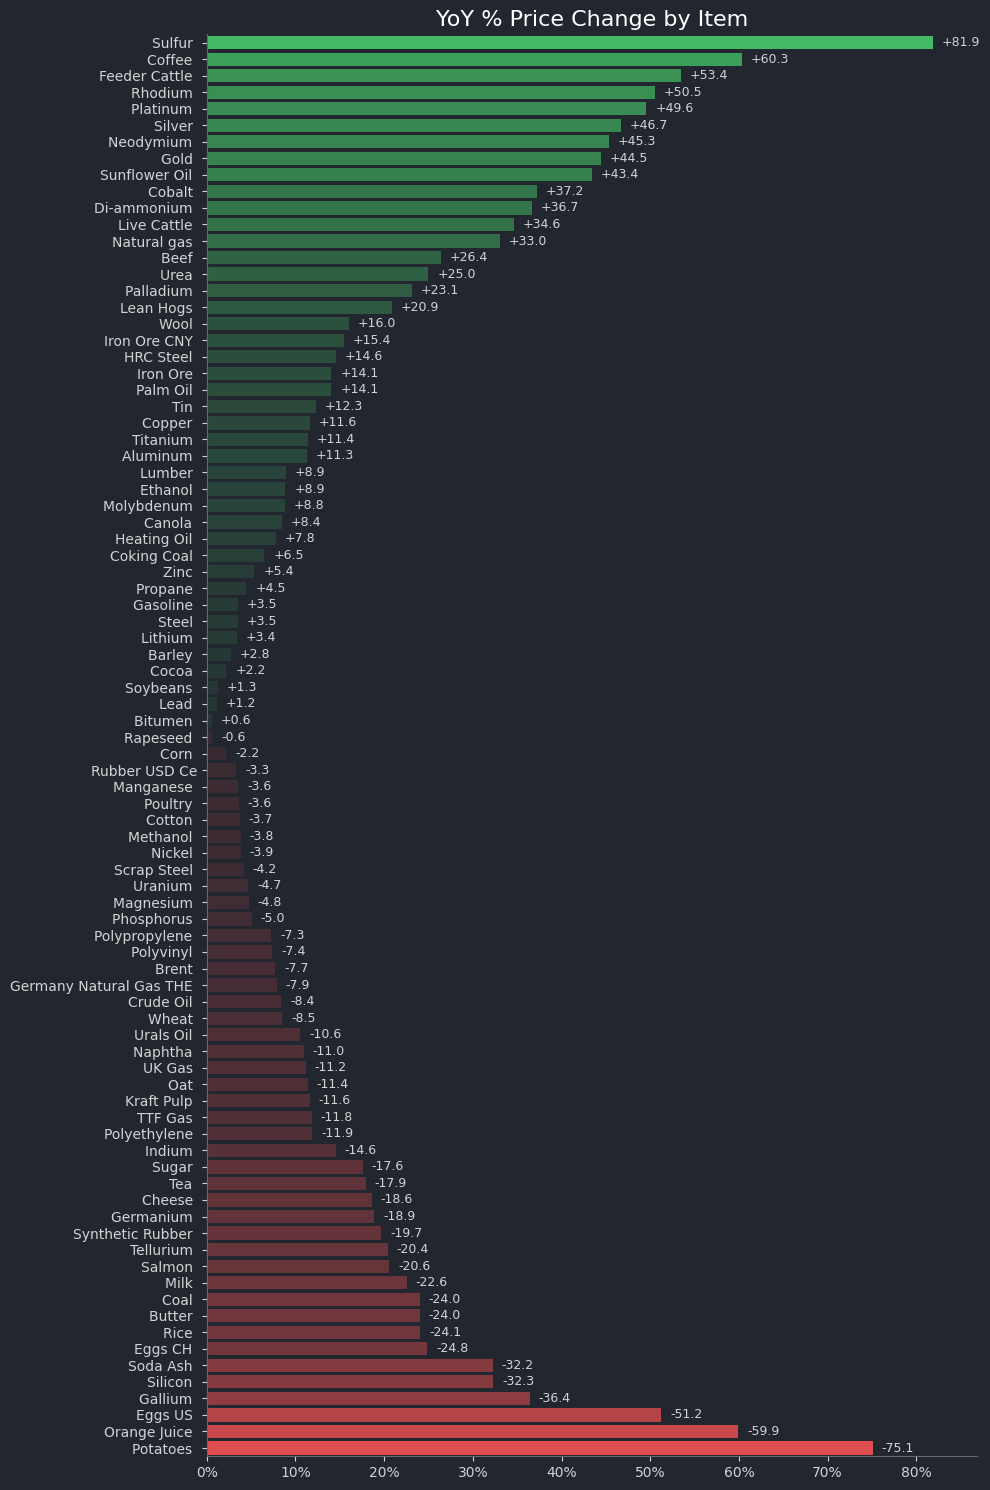

In [15]:
# Prepare x and y data
df = TradingEconomics.download_commodities().table
df = df[['Item', 'YoY %']][(df['Category'] != 'Index') & (df['Category'] != 'Electricity')]
df_sorted = df.sort_values(by='YoY %', ascending=False, ignore_index=True)
x = df_sorted['YoY %']
y = df_sorted['Item']

# Define colors
background_color = '#22262F'
pos_bar_color = '#30CC5A'
neg_bar_color = '#F63538'
title_color = 'white'
axes_label_color = 'lightgray'
tick_color = 'lightgray'
spine_color = 'dimgray'
data_label_color = 'lightgray'

# Create figure
bar_colors = ['r' if x < 0 else 'g' for x in x]
color_palette = {'r': neg_bar_color, 'g': pos_bar_color}
x = abs(x)

fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x=x, y=y, hue=bar_colors, palette=color_palette, legend=False)
ax.set_title('YoY % Price Change by Item', fontsize=16, color=title_color)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%"))
ax.set_xlabel('')
ax.set_ylabel('')

# Add data labels
labels = [f'+{x:.1f}' if x > 0 else f'{x:.1f}' for x in df_sorted['YoY %']]
labels_idx_offset = 0
for container in ax.containers:  
    for i, bar in enumerate(container):
        x_val = bar.get_width()
        y_val = bar.get_y() + bar.get_height() / 2
        label = labels[i + labels_idx_offset]
        ax.text(x_val + 1, y_val, label, va='center', ha='left', fontsize=9, color=data_label_color)
    labels_idx_offset += len(container)

# Customize figure
ax.set_xlim(0, max(x) + 5)

fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.tick_params(axis='x', colors=tick_color)
ax.tick_params(axis='y', colors=tick_color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)

# Control transparency of bars based on change magnitude; less change = less solid
x = df_sorted['YoY %']
x_pos = x[x >= 0]
x_neg = abs(x[x < 0])
norm_alpha_pos = colors.Normalize(vmin=x_pos.min(), vmax=0.9*x_pos.max(), clip=True)
norm_alpha_neg = colors.Normalize(vmin=x_neg.min(), vmax=0.9*x_neg.max(), clip=True)
min_alpha, max_alpha = 0.1, 1
bar_alphas = [
    min_alpha + (max_alpha - min_alpha) * norm_alpha_neg(abs(val)) if val < 0 else
    min_alpha + (max_alpha - min_alpha) * norm_alpha_pos(abs(val)) for val in x]
[bar.set_alpha(alpha) for alpha, bar in zip(bar_alphas, ax.patches)]

# Show plot
plt.tight_layout()
plt.show()

## 7. Industry and Stock-Level Data from FinViz

[Finviz](https://finviz.com/) offers a wealth of stock market data and a powerful screener. The idea is not to replicate the screener, but to quickly and conveniently retrieve data for custom computations/visualizations.

#### Getting Industry-Level and Stock-Level Data from Finviz

In [16]:
industries = Finviz.download_industries()

industry_table = industries.table
industry_table = industry_table.set_index(industry_table.columns[0]) 
displayMD(industry_table.head(), index=True, bold=True, align='center')

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Market Cap (m USD)</b></th>
      <th><b>P/E</b></th>
      <th><b>Fwd P/E</b></th>
      <th><b>PEG</b></th>
      <th><b>P/S</b></th>
      <th><b>P/B</b></th>
      <th><b>P/C</b></th>
      <th><b>P/FCF</b></th>
      <th><b>Dividend (%)</b></th>
      <th><b>EPS past 5Y (%)</b></th>
      <th><b>EPS next 5Y (%)</b></th>
      <th><b>Sales past 5Y (%)</b></th>
      <th><b>Float Short (%)</b></th>
      <th><b>Perf Week (%)</b></th>
      <th><b>Perf Month (%)</b></th>
      <th><b>Perf Quart (%)</b></th>
      <th><b>Perf Half (%)</b></th>
      <th><b>Perf Year (%)</b></th>
      <th><b>Perf YTD (%)</b></th>
      <th><b>Recom</b></th>
      <th><b>Avg Volume (m USD)</b></th>
      <th><b>Rel Volume</b></th>
      <th><b>Change (%)</b></th>
      <th><b>Volume (m USD)</b></th>
      <th><b>Stocks</b></th>
    </tr>
    <tr>
      <th><b>Industry</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Advertising Agencies</b></th>
      <td>237240.0</td>
      <td>46.3</td>
      <td>23.93</td>
      <td>1.16</td>
      <td>3.48</td>
      <td>9.94</td>
      <td>19.52</td>
      <td>27.81</td>
      <td>0.69</td>
      <td>64.12</td>
      <td>39.83</td>
      <td>29.72</td>
      <td>6.88</td>
      <td>0.47</td>
      <td>8.48</td>
      <td>8.85</td>
      <td>39.36</td>
      <td>69.35</td>
      <td>6.52</td>
      <td>1.74</td>
      <td>53.51</td>
      <td>0.83</td>
      <td>-1.13</td>
      <td>44.21</td>
      <td>43</td>
    </tr>
    <tr>
      <th><b>Aerospace &amp; Defense</b></th>
      <td>1541930.0</td>
      <td>42.75</td>
      <td>31.1</td>
      <td>2.78</td>
      <td>3.06</td>
      <td>7.22</td>
      <td>24.22</td>
      <td>52.14</td>
      <td>0.84</td>
      <td>20.7</td>
      <td>15.37</td>
      <td>3.49</td>
      <td>4.73</td>
      <td>-1.01</td>
      <td>0.15</td>
      <td>8.61</td>
      <td>29.0</td>
      <td>34.17</td>
      <td>32.47</td>
      <td>1.84</td>
      <td>186.35</td>
      <td>0.65</td>
      <td>-0.12</td>
      <td>121.38</td>
      <td>76</td>
    </tr>
    <tr>
      <th><b>Agricultural Inputs</b></th>
      <td>118610.0</td>
      <td>21.45</td>
      <td>14.48</td>
      <td>1.74</td>
      <td>1.5</td>
      <td>1.47</td>
      <td>16.08</td>
      <td>16.93</td>
      <td>2.46</td>
      <td>3.14</td>
      <td>12.31</td>
      <td>4.37</td>
      <td>1.68</td>
      <td>-3.46</td>
      <td>-0.15</td>
      <td>-4.32</td>
      <td>13.2</td>
      <td>16.83</td>
      <td>18.36</td>
      <td>2.03</td>
      <td>18.45</td>
      <td>0.91</td>
      <td>-0.4</td>
      <td>16.73</td>
      <td>15</td>
    </tr>
    <tr>
      <th><b>Airlines</b></th>
      <td>169280.0</td>
      <td>12.82</td>
      <td>9.79</td>
      <td>0.7</td>
      <td>0.61</td>
      <td>2.72</td>
      <td>3.42</td>
      <td>14.58</td>
      <td>1.17</td>
      <td>-5.88</td>
      <td>18.39</td>
      <td>6.14</td>
      <td>6.27</td>
      <td>-1.52</td>
      <td>9.66</td>
      <td>18.69</td>
      <td>17.33</td>
      <td>52.74</td>
      <td>9.48</td>
      <td>1.69</td>
      <td>130.75</td>
      <td>1.18</td>
      <td>0.39</td>
      <td>154.39</td>
      <td>18</td>
    </tr>
    <tr>
      <th><b>Airports &amp; Air Services</b></th>
      <td>41720.0</td>
      <td>30.73</td>
      <td>20.9</td>
      <td>2.57</td>
      <td>5.31</td>
      <td>7.01</td>
      <td>11.72</td>
      <td>32.71</td>
      <td>4.07</td>
      <td>20.57</td>
      <td>11.98</td>
      <td>13.25</td>
      <td>5.96</td>
      <td>-2.68</td>
      <td>-6.78</td>
      <td>19.7</td>
      <td>44.97</td>
      <td>63.23</td>
      <td>42.05</td>
      <td>2.74</td>
      <td>42.51</td>
      <td>1.01</td>
      <td>0.82</td>
      <td>43.06</td>
      <td>9</td>
    </tr>
  </tbody>
</table></div>

In [17]:
stocks = Finviz.download_stocks(num_rows=10) # if num_rows is not specified, all rows are returned.

stocks_table = stocks.table
stocks_table = stocks_table.set_index(stocks_table.columns[0])
displayMD(stocks_table, index=True, bold=True, align='center')

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Company</b></th>
      <th><b>Index</b></th>
      <th><b>Sector</b></th>
      <th><b>Industry</b></th>
      <th><b>Country</b></th>
      <th><b>Exchange</b></th>
      <th><b>Market Cap (m USD)</b></th>
      <th><b>P/E</b></th>
      <th><b>Fwd P/E</b></th>
      <th><b>PEG</b></th>
      <th><b>P/S</b></th>
      <th><b>P/B</b></th>
      <th><b>P/C</b></th>
      <th><b>P/FCF</b></th>
      <th><b>Book/sh</b></th>
      <th><b>Cash/sh</b></th>
      <th><b>Dividend</b></th>
      <th><b>Dividend (%)</b></th>
      <th><b>Dividend TTM</b></th>
      <th><b>Dividend Ex Date</b></th>
      <th><b>Payout Ratio (%)</b></th>
      <th><b>EPS</b></th>
      <th><b>EPS next Q</b></th>
      <th><b>EPS This Y (%)</b></th>
      <th><b>EPS Next Y (%)</b></th>
      <th><b>EPS Past 5Y (%)</b></th>
      <th><b>EPS Next 5Y (%)</b></th>
      <th><b>Sales Past 5Y (%)</b></th>
      <th><b>Sales Q/Q (%)</b></th>
      <th><b>EPS Q/Q (%)</b></th>
      <th><b>EPS YoY TTM (%)</b></th>
      <th><b>Sales YoY TTM (%)</b></th>
      <th><b>Sales (m USD)</b></th>
      <th><b>Income (m USD)</b></th>
      <th><b>EPS Surprise (%)</b></th>
      <th><b>Revenue Surprise (%)</b></th>
      <th><b>Outstanding (m USD)</b></th>
      <th><b>Float (m USD)</b></th>
      <th><b>Float %</b></th>
      <th><b>Insider Own (%)</b></th>
      <th><b>Insider Trans (%)</b></th>
      <th><b>Inst Own (%)</b></th>
      <th><b>Inst Trans (%)</b></th>
      <th><b>Short Float (%)</b></th>
      <th><b>Short Ratio</b></th>
      <th><b>Short Interest (m USD)</b></th>
      <th><b>ROA (%)</b></th>
      <th><b>ROE (%)</b></th>
      <th><b>ROIC (%)</b></th>
      <th><b>Curr R</b></th>
      <th><b>Quick R</b></th>
      <th><b>LTDebt/Eq</b></th>
      <th><b>Debt/Eq</b></th>
      <th><b>Gross M (%)</b></th>
      <th><b>Oper M (%)</b></th>
      <th><b>Profit M (%)</b></th>
      <th><b>Perf Week (%)</b></th>
      <th><b>Perf Month (%)</b></th>
      <th><b>Perf Quart (%)</b></th>
      <th><b>Perf Half (%)</b></th>
      <th><b>Perf Year (%)</b></th>
      <th><b>Perf YTD (%)</b></th>
      <th><b>Beta</b></th>
      <th><b>ATR</b></th>
      <th><b>Volatility W (%)</b></th>
      <th><b>Volatility M (%)</b></th>
      <th><b>SMA20 (%)</b></th>
      <th><b>SMA50 (%)</b></th>
      <th><b>SMA200 (%)</b></th>
      <th><b>50D High (%)</b></th>
      <th><b>50D Low (%)</b></th>
      <th><b>52W High (%)</b></th>
      <th><b>52W Low (%)</b></th>
      <th><b>52W Range</b></th>
      <th><b>All-Time High (%)</b></th>
      <th><b>All-Time Low (%)</b></th>
      <th><b>RSI</b></th>
      <th><b>Earnings</b></th>
      <th><b>IPO Date</b></th>
      <th><b>Optionable</b></th>
      <th><b>Shortable</b></th>
      <th><b>Employees</b></th>
      <th><b>Change from Open (%)</b></th>
      <th><b>Gap (%)</b></th>
      <th><b>Recom</b></th>
      <th><b>Avg Volume (m USD)</b></th>
      <th><b>Rel Volume</b></th>
      <th><b>Volume</b></th>
      <th><b>Target Price</b></th>
      <th><b>Prev Close</b></th>
      <th><b>Open</b></th>
      <th><b>High</b></th>
      <th><b>Low</b></th>
      <th><b>Price</b></th>
      <th><b>Change (%)</b></th>
    </tr>
    <tr>
      <th><b>Ticker</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>A</b></th>
      <td>Agilent Technologies Inc</td>
      <td>S&amp;P 500</td>
      <td>Healthcare</td>
      <td>Diagnostics &amp; Research</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>36500.0</td>
      <td>30.19</td>
      <td>21.41</td>
      <td>3.83</td>
      <td>5.38</td>
      <td>5.73</td>
      <td>23.78</td>
      <td>33.55</td>
      <td>22.46</td>
      <td>5.41</td>
      <td>0.98</td>
      <td>0.76</td>
      <td>0.98</td>
      <td>01/07/2025</td>
      <td>21.31</td>
      <td>4.26</td>
      <td>1.59</td>
      <td>5.34</td>
      <td>7.91</td>
      <td>5.63</td>
      <td>7.88</td>
      <td>4.75</td>
      <td>10.14</td>
      <td>21.66</td>
      <td>-11.52</td>
      <td>4.48</td>
      <td>6790.0</td>
      <td>1220.0</td>
      <td>0.12</td>
      <td>3.17</td>
      <td>283.59</td>
      <td>282.71</td>
      <td>99.69</td>
      <td>0.48</td>
      <td>-1.18</td>
      <td>91.58</td>
      <td>0.94</td>
      <td>1.02</td>
      <td>1.66</td>
      <td>2.88</td>
      <td>10.51</td>
      <td>19.88</td>
      <td>12.55</td>
      <td>2.25</td>
      <td>1.71</td>
      <td>0.53</td>
      <td>0.54</td>
      <td>52.98</td>
      <td>22.91</td>
      <td>17.97</td>
      <td>3.03</td>
      <td>13.71</td>
      <td>13.0</td>
      <td>1.74</td>
      <td>-7.35</td>
      <td>-4.16</td>
      <td>1.26</td>
      <td>3.02</td>
      <td>2.52</td>
      <td>2.22</td>
      <td>6.63</td>
      <td>8.18</td>
      <td>4.0</td>
      <td>-0.06</td>
      <td>16.25</td>
      <td>-16.31</td>
      <td>33.52</td>
      <td>96.43 - 153.84</td>
      <td>-28.3</td>
      <td>1719.89</td>
      <td>67.96</td>
      <td>27/08/2025</td>
      <td>18/11/1999</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>17900</td>
      <td>0.02</td>
      <td>0.19</td>
      <td>2.24</td>
      <td>1.74</td>
      <td>0.94</td>
      <td>1633203</td>
      <td>138.5</td>
      <td>128.48</td>
      <td>128.72</td>
      <td>131.0</td>
      <td>128.39</td>
      <td>128.75</td>
      <td>0.21</td>
    </tr>
    <tr>
      <th><b>AA</b></th>
      <td>Alcoa Corp</td>
      <td>-</td>
      <td>Basic Materials</td>
      <td>Aluminum</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>8240.0</td>
      <td>8.16</td>
      <td>12.53</td>
      <td>0.25</td>
      <td>0.63</td>
      <td>1.34</td>
      <td>4.92</td>
      <td>14.16</td>
      <td>23.7</td>
      <td>6.47</td>
      <td>0.4</td>
      <td>1.26</td>
      <td>0.4</td>
      <td>12/08/2025</td>
      <td>142.65</td>
      <td>3.9</td>
      <td>0.26</td>
      <td>149.09</td>
      <td>-24.48</td>
      <td>&lt;NA&gt;</td>
      <td>32.26</td>
      <td>3.03</td>
      <td>3.85</td>
      <td>470.86</td>
      <td>227.19</td>
      <td>21.32</td>
      <td>13020.0</td>
      <td>1000.0</td>
      <td>20.97</td>
      <td>3.8</td>
      <td>258.91</td>
      <td>257.81</td>
      <td>99.58</td>
      <td>0.43</td>
      <td>0.0</td>
      <td>78.59</td>
      <td>3.34</td>
      <td>4.46</td>
      <td>1.98</td>
      <td>11.49</td>
      <td>6.85</td>
      <td>20.01</td>
      <td>11.53</td>
      <td>1.65</td>
      <td>0.97</td>
      <td>0.42</td>
      <td>0.43</td>
      <td>18.81</td>
      <td>16.07</td>
      <td>7.71</td>
      <td>-0.28</td>
      <td>7.72</td>
      <td>14.21</td>
      <td>-3.05</td>
      <td>5.33</td>
      <td>-15.75</td>
      <td>2.21</td>
      <td>1.11</td>
      <td>3.01</td>
      <td>3.37</td>
      <td>2.67</td>
      <td>4.25</td>
      <td>-2.31</td>
      <td>-1.97</td>
      <td>14.83</td>
      <td>-33.37</td>
      <td>47.84</td>
      <td>21.53 - 47.77</td>
      <td>-67.55</td>
      <td>516.86</td>
      <td>56.7</td>
      <td>16/07/2025</td>
      <td>18/10/2016</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>13900</td>
      <td>0.51</td>
      <td>1.21</td>
      <td>2.14</td>
      <td>5.81</td>
      <td>0.97</td>
      <td>5659768</td>
      <td>32.9</td>
      <td>31.29</td>
      <td>31.67</td>
      <td>32.07</td>
      <td>30.99</td>
      <td>31.83</td>
      <td>1.73</td>
    </tr>
    <tr>
      <th><b>AACB</b></th>
      <td>Artius II Acquisition Inc</td>
      <td>-</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NASD</td>
      <td>295.29</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>1.33</td>
      <td>1230.37</td>
      <td>&lt;NA&gt;</td>
      <td>7.63</td>
      <td>0.01</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>29.15</td>
      <td>23.48</td>
      <td>80.55</td>
      <td>19.47</td>
      <td>0.0</td>
      <td>65.23</td>
      <td>&lt;NA&gt;</td>
      <td>0.02</td>
      <td>0.05</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>2.92</td>
      <td>2.92</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.1</td>
      <td>0.0</td>
      <td>1.4</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>2.53</td>
      <td>&lt;NA&gt;</td>
      <td>0.01</td>
      <td>0.0</td>
      <td>0.08</td>
      <td>-0.03</td>
      <td>0.12</td>
      <td>0.75</td>
      <td>-0.49</td>
      <td>1.0</td>
      <td>-0.49</td>
      <td>2.84</td>
      <td>9.85 - 10.18</td>
      <td>-0.49</td>
      <td>2.84</td>
      <td>52.12</td>
      <td>&amp;nbsp;</td>
      <td>07/04/2025</td>
      <td>No</td>
      <td>Yes</td>
      <td>1</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>0.08956</td>
      <td>0.04</td>
      <td>3505</td>
      <td>&lt;NA&gt;</td>
      <td>10.13</td>
      <td>10.13</td>
      <td>10.13</td>
      <td>10.13</td>
      <td>10.13</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th><b>AACG</b></th>
      <td>ATA Creativity Global ADR</td>
      <td>-</td>
      <td>Consumer Defensive</td>
      <td>Education &amp; Training Services</td>
      <td>China</td>
      <td>NASD</td>
      <td>64.94</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>1.67</td>
      <td>8.33</td>
      <td>13.42</td>
      <td>&lt;NA&gt;</td>
      <td>0.24</td>
      <td>0.15</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>27/08/2018</td>
      <td>&lt;NA&gt;</td>
      <td>-0.11</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>26.78</td>
      <td>&lt;NA&gt;</td>
      <td>21.36</td>
      <td>8.11</td>
      <td>35.5</td>
      <td>24.98</td>
      <td>15.48</td>
      <td>38.81</td>
      <td>-3.52</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>31.91</td>
      <td>8.84</td>
      <td>27.7</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.51</td>
      <td>-0.29</td>
      <td>2.35</td>
      <td>0.86</td>
      <td>0.21</td>
      <td>-5.59</td>
      <td>-37.39</td>
      <td>-36.0</td>
      <td>0.19</td>
      <td>0.19</td>
      <td>0.26</td>
      <td>0.82</td>
      <td>52.67</td>
      <td>-11.16</td>
      <td>-9.08</td>
      <td>-8.74</td>
      <td>27.19</td>
      <td>154.34</td>
      <td>97.57</td>
      <td>251.47</td>
      <td>140.54</td>
      <td>1.06</td>
      <td>0.25</td>
      <td>14.0</td>
      <td>14.57</td>
      <td>4.56</td>
      <td>43.13</td>
      <td>96.6</td>
      <td>-11.52</td>
      <td>170.94</td>
      <td>-11.52</td>
      <td>307.0</td>
      <td>0.50 - 2.30</td>
      <td>-89.7</td>
      <td>837.94</td>
      <td>56.33</td>
      <td>25/03/2025</td>
      <td>29/01/2008</td>
      <td>No</td>
      <td>Yes</td>
      <td>599</td>
      <td>-7.08</td>
      <td>1.86</td>
      <td>1.0</td>
      <td>0.24175</td>
      <td>0.49</td>
      <td>119470</td>
      <td>6.5</td>
      <td>2.15</td>
      <td>2.19</td>
      <td>2.28</td>
      <td>2.03</td>
      <td>2.04</td>
      <td>-5.35</td>
    </tr>
    <tr>
      <th><b>AACI</b></th>
      <td>Armada Acquisition Corp. II</td>
      <td>-</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NASD</td>
      <td>323.8</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>674.57</td>
      <td>&lt;NA&gt;</td>
      <td>-0.27</td>
      <td>0.02</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>23.71</td>
      <td>23.71</td>
      <td>100.0</td>
      <td>24.94</td>
      <td>0.0</td>
      <td>40.65</td>
      <td>&lt;NA&gt;</td>
      <td>0.04</td>
      <td>0.05</td>
      <td>0.01</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>4.66</td>
      <td>4.66</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>-0.39</td>
      <td>2.09</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>2.09</td>
      <td>&lt;NA&gt;</td>
      <td>0.09</td>
      <td>0.17</td>
      <td>0.44</td>
      <td>-0.02</td>
      <td>1.13</td>
      <td>1.13</td>
      <td>-2.38</td>
      <td>7.89</td>
      <td>-2.38</td>
      <td>7.89</td>
      <td>9.50 - 10.50</td>
      <td>-2.38</td>
      <td>2.5</td>
      <td>56.55</td>
      <td>&amp;nbsp;</td>
      <td>24/06/2025</td>
      <td>No</td>
      <td>Yes</td>
      <td>&lt;NA&gt;</td>
      <td>-0.39</td>
      <td>0.34</td>
      <td>&lt;NA&gt;</td>
      <td>0.18649</td>
      <td>0.13</td>
      <td>24133</td>
      <td>&lt;NA&gt;</td>
      <td>10.26</td>
      <td>10.29</td>
      <td>10.25</td>
      <td>10.24</td>
      <td>10.25</td>
      <td>-0.05</td>
    </tr>
    <tr>
      <th><b>AACT</b></th>
      <td>Ares Acquisition Corporation II</td>
      <td>-</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>706.44</td>
      <td>43.7</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>1.32</td>
      <td>5045.99</td>
      <td>&lt;NA&gt;</td>
      <td>8.63</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>0.0</td>
      <td>0.26</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>-94.97</td>
      <td>-37.96</td>
      <td>&lt;NA&gt;</td>
      <td>0.0</td>
      <td>16.33</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>61.86</td>
      <td>49.36</td>
      <td>79.79</td>
      <td>20.21</td>
      <td>0.0</td>
      <td>92.06</td>
      <td>&lt;NA&gt;</td>
      <td>0.04</td>
      <td>0.06</td>
      <td>0.02</td>
      <td>2.97</td>
      <td>3.11</td>
      <td>3.02</td>
      <td>0.23</td>
      <td>0.23</td>
      <td>0.01</td>
      <td>0.02</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.44</td>
      <td>0.09</td>
      <td>0.0</td>
      <td>2.93</td>
      <td>6.13</td>
      <td>4.01</td>
      <td>-0.01</td>
      <td>0.04</td>
      <td>0.15</td>
      <td>0.32</td>
      <td>0.24</td>
      <td>0.34</td>
      <td>2.11</td>
      <td>-0.52</td>
      <td>1.2</td>
      <td>-1.72</td>
      <td>6.13</td>
      <td>10.76 - 11.62</td>
      <td>-1.72</td>
      <td>13.13</td>
      <td>55.78</td>
      <td>&amp;nbsp;</td>
      <td>12/06/2023</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>4</td>
      <td>0.09</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>0.30287</td>
      <td>1.22</td>
      <td>370662</td>
      <td>&lt;NA&gt;</td>
      <td>11.41</td>
      <td>11.41</td>
      <td>11.43</td>
      <td>11.41</td>
      <td>11.42</td>
      <td>0.09</td>
    </tr>
    <tr>
      <th><b>AAL</b></th>
      <td>American Airlines Group Inc</td>
      <td>-</td>
      <td>Industrials</td>
      <td>Airlines</td>
      <td>USA</td>
      <td>NASD</td>
      <td>8630.0</td>
      <td>16.82</td>
      <td>7.8</td>
      <td>2.58</td>
      <td>0.16</td>
      <td>&lt;NA&gt;</td>
      <td>0.92</td>
      <td>5.52</td>
      <td>-5.87</td>
      <td>14.22</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>04/02/2020</td>
      <td>0.0</td>
      <td>0.78</td>
      <td>-0.28</td>
      <td>-76.2</td>
      <td>259.47</td>
      <td>-20.93</td>
      <td>6.51</td>
      <td>3.44</td>
      <td>0.4</td>
      <td>-8.87</td>
      <td>556.18</td>
      <td>1.5</td>
      <td>54250.0</td>
      <td>567.0</td>
      <td>21.78</td>
      <td>0.68</td>
      <td>659.8</td>
      <td>649.4</td>
      <td>98.42</td>
      <td>1.58</td>
      <td>0.0</td>
      <td>64.8</td>
      <td>-2.93</td>
      <td>10.02</td>
      <td>1.01</td>
      <td>65.05</td>
      <td>0.89</td>
      <td>&lt;NA&gt;</td>
      <td>2.05</td>
      <td>0.58</td>
      <td>0.48</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>20.75</td>
      <td>5.06</td>
      <td>1.05</td>
      <td>-1.28</td>
      <td>11.41</td>
      <td>16.06</td>
      <td>-1.28</td>
      <td>23.4</td>
      <td>-24.96</td>
      <td>1.4</td>
      <td>0.48</td>
      <td>4.17</td>
      <td>3.51</td>
      <td>0.9</td>
      <td>6.66</td>
      <td>-1.07</td>
      <td>-6.64</td>
      <td>20.0</td>
      <td>-31.52</td>
      <td>53.88</td>
      <td>8.50 - 19.10</td>
      <td>-77.86</td>
      <td>58.55</td>
      <td>54.86</td>
      <td>24/07/2025</td>
      <td>09/12/2013</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>133300</td>
      <td>1.4</td>
      <td>0.31</td>
      <td>2.25</td>
      <td>64.15</td>
      <td>1.41</td>
      <td>90324237</td>
      <td>13.75</td>
      <td>12.86</td>
      <td>12.9</td>
      <td>13.28</td>
      <td>12.81</td>
      <td>13.08</td>
      <td>1.71</td>
    </tr>
    <tr>
      <th><b>AAM</b></th>
      <td>AA Mission Acquisition Corp</td>
      <td>-</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>461.29</td>
      <td>35.68</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>1.31</td>
      <td>536.38</td>
      <td>&lt;NA&gt;</td>
      <td>8.0</td>
      <td>0.02</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>0.0</td>
      <td>0.29</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>3096.3</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.0</td>
      <td>12.93</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>35.35</td>
      <td>29.32</td>
      <td>82.94</td>
      <td>33.32</td>
      <td>0.0</td>
      <td>85.37</td>
      <td>&lt;NA&gt;</td>
      <td>0.0</td>
      <td>0.01</td>
      <td>0.0</td>
      <td>7.13</td>
      <td>7.35</td>
      <td>3.68</td>
      <td>0.7</td>
      <td>0.7</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.1</td>
      <td>0.29</td>
      <td>1.35</td>
      <td>3.15</td>
      <td>&lt;NA&gt;</td>
      <td>3.86</td>
      <td>-0.06</td>
      <td>0.02</td>
      <td>0.11</td>
      <td>0.19</td>
      <td>0.08</td>
      <td>0.34</td>
      <td>2.21</td>
      <td>-0.1</td>
      <td>0.87</td>
      <td>-2.78</td>
      <td>5.32</td>
      <td>9.96 - 10.79</td>
      <td>-2.78</td>
      <td>5.32</td>
      <td>54.21</td>
      <td>&amp;nbsp;</td>
      <td>16/09/2024</td>
      <td>No</td>
      <td>Yes</td>
      <td>2</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>0.0508</td>
      <td>3.96</td>
      <td>201045</td>
      <td>&lt;NA&gt;</td>
      <td>10.49</td>
      <td>10.49</td>
      <td>10.49</td>
      <td>10.49</td>
      <td>10.49</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th><b>AAME</b></th>
      <td>Atlantic American Corp</td>
      <td>-</td>
      <td>Financial</td>
      <td>Insurance - Life</td>
      <td>USA</td>
      <td>NASD</td>
      <td>66.6</td>
      <td>32.91</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.33</td>
      <td>0.63</td>
      <td>&lt;NA&gt;</td>
      <td>3.76</td>
      <td>5.2</td>
      <td>&lt;NA&gt;</td>
      <td>0.02</td>
      <td>0.61</td>
      <td>0.02</td>
      <td>09/04/2025</td>
      <td>&lt;NA&gt;</td>
      <td>0.1</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>-42.6</td>
      <td>&lt;NA&gt;</td>
      <td>-1.03</td>
      <td>15.99</td>
      <td>496.61</td>
      <td>160.11</td>
      <td>6.98</td>
      <td>198.98</td>
      <td>2.13</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>20.4</td>
      <td>3.83</td>
      <td>18.77</td>
      <td>81.21</td>
      <td>0.0</td>
      <td>4.28</td>
      <td>0.28</td>
      <td>0.15</td>
      <td>0.19</td>
      <td>0.01</td>
      <td>0.66</td>
      <td>2.45</td>
      <td>1.43</td>
      <td>1.3</td>
      <td>&lt;NA&gt;</td>
      <td>0.4</td>
      <td>0.41</td>
      <td>&lt;NA&gt;</td>
      <td>3.31</td>
      <td>1.07</td>
      <td>-2.54</td>
      <td>40.73</td>
      <td>88.73</td>
      <td>120.61</td>
      <td>104.06</td>
      <td>112.01</td>
      <td>0.78</td>
      <td>0.25</td>
      <td>7.39</td>
      <td>9.77</td>
      <td>4.86</td>
      <td>27.32</td>
      <td>77.84</td>
      <td>-11.99</td>
      <td>71.35</td>
      <td>-11.99</td>
      <td>161.68</td>
      <td>1.25 - 3.71</td>
      <td>-79.56</td>
      <td>798.76</td>
      <td>61.22</td>
      <td>&amp;nbsp;</td>
      <td>17/03/1980</td>
      <td>No</td>
      <td>Yes</td>
      <td>156</td>
      <td>-2.25</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>0.03049</td>
      <td>0.69</td>
      <td>21139</td>
      <td>&lt;NA&gt;</td>
      <td>3.34</td>
      <td>3.34</td>
      <td>3.34</td>
      <td>3.05</td>
      <td>3.27</td>
      <td>-2.25</td>
    </tr>
    <tr>
      <th><b>AAMI</b></th>
      <td>Acadian Asset Management Inc</td>
      <td>RUT</td>
      <td>Financial</td>
      <td>Asset Management</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>1590.0</td>
      <td>18.55</td>
      <td>10.26</td>
      <td>&lt;NA&gt;</td>
      <td>2.84</td>
      <td>173.06</td>
      <td>16.96</td>
      <td>15.72</td>
      <td>0.26</td>
      <td>2.62</td>
      <td>0.04</td>
      <td>0.09</td>
      <td>0.04</td>
      <td>12/09/2025</td>
      <td>1.8</td>
      <td>2.4</td>
      <td>0.71</td>
      <td>20.29</td>
      <td>30.57</td>
      <td>-1.99</td>
      <td>&lt;NA&gt;</td>
      <td>-9.68</td>
      <td>26.65</td>
      <td>-2.29</td>
      <td>42.83</td>
      <td>21.14</td>
      <td>560.4</td>
      <td>89.6</td>
      <td>21.9</td>
      <td>6.21</td>
      <td>35.81</td>
      <td>35.15</td>
      <td>98.16</td>
      <td>1.85</td>
      <td>-64.56</td>
      <td>100.5</td>
      <td>-0.54</td>
      <td>1.83</td>
      <td>2.33</td>
      <td>0.64</td>
      <td>14.87</td>
      <td>282.39</td>
      <td>24.7</td>
      <td>1.71</td>
      <td>1.71</td>
      <td>38.43</td>
      <td>38.95</td>
      <td>96.41</td>
      <td>29.09</td>
      <td>15.99</td>
      <td>-13.28</td>
      <td>-2.93</td>
      <td>47.9</td>
      <td>84.02</td>
      <td>89.76</td>
      <td>68.79</td>
      <td>1.42</td>
      <td>2.07</td>
      <td>5.6</td>
      <td>3.83</td>
      <td>-7.36</td>
      <td>3.91</td>
      <td>41.99</td>
      <td>-13.91</td>
      <td>35.57</td>
      <td>-13.91</td>
      <td>96.73</td>
      <td>22.60 - 51.65</td>
      <td>-13.91</td>
      <td>1131.58</td>
      <td>44.76</td>
      <td>31/07/2025</td>
      <td>09/10/2014</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>383</td>
      <td>4.24</td>
      <td>0.09</td>
      <td>3.0</td>
      <td>0.27564</td>
      <td>3.46</td>
      <td>954965</td>
      <td>43.33</td>
      <td>42.61</td>
      <td>42.65</td>
      <td>45.08</td>
      <td>42.15</td>
      <td>44.46</td>
      <td>4.34</td>
    </tr>
  </tbody>
</table></div>

<br>The description of a particular stock may be obtained as follows:

In [18]:
desc = FinvizScreener.stock_description(['AAPL', 'GOOGL', 'MSFT', 'TSLA'])
displayMD(desc['AAPL'], block=True)

><p style="text-align: left";>Apple, Inc. engages in the design, manufacture, and sale of smartphones, personal computers, tablets, wearables and accessories, and other varieties of related services. It operates through the following geographical segments: Americas, Europe, Greater China, Japan, and Rest of Asia Pacific. The Americas segment includes North and South America. The Europe segment consists of European countries, as well as India, the Middle East, and Africa. The Greater China segment comprises China, Hong Kong, and Taiwan. The Rest of Asia Pacific segment includes Australia and Asian countries. Its products and services include iPhone, Mac, iPad, AirPods, Apple TV, Apple Watch, Beats products, AppleCare, iCloud, digital content stores, streaming, and licensing services. The company was founded by Steven Paul Jobs, Ronald Gerald Wayne, and Stephen G. Wozniak in April 1976 and is headquartered in Cupertino, CA.</p>

## 8. Loading Extracted Data into SQLite Database

The extracted data is stored in a light-weight SQLite database using the DBTransaction class and its methods, in utility.py, written in SQLAlchemy. Each scraper class has methods to prepare the data in the format/structure that reflects the target database tables.

In [19]:
ism_man.load()
ism_serv.load()
consumer.load()
build.load()
euro.load()
caixin.load()
commodities.load()

Successful upsert in US_Man_Pmi_Report.
Successful upsert in US_Man_Industry_Ranking.
Successful upsert in US_Ser_Pmi_Report.
Successful upsert in US_Ser_Industry_Ranking.
Successful upsert in US_Consumers.
Successful upsert in US_Buildings.
Successful upsert in EU_Economic_Sentiment.
Successful upsert in Caixin_PMI.
Successful upsert in Commodities.


Data from the database tables may be obtained using the df_from_sql method in the DBTransaction class (examples below).

In [20]:
from utility import DBTransaction

consumers = DBTransaction().df_from_sql('US_Consumers')
indices = DBTransaction().df_from_sql('Stock_Indices')

displayMD(consumers.tail(6), index=True, bold=True, align='center')
displayMD(indices.head(10), index=True, bold=True, align='center')

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>year</b></th>
      <th><b>month</b></th>
      <th><b>consumer_sentiment_index</b></th>
      <th><b>current_conditions_index</b></th>
      <th><b>expectations_index</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>7</b></th>
      <td>2025</td>
      <td>3</td>
      <td>57.0</td>
      <td>63.8</td>
      <td>52.6</td>
    </tr>
    <tr>
      <th><b>8</b></th>
      <td>2025</td>
      <td>4</td>
      <td>52.2</td>
      <td>59.8</td>
      <td>47.3</td>
    </tr>
    <tr>
      <th><b>9</b></th>
      <td>2025</td>
      <td>5</td>
      <td>52.2</td>
      <td>58.9</td>
      <td>47.9</td>
    </tr>
    <tr>
      <th><b>10</b></th>
      <td>2025</td>
      <td>6</td>
      <td>60.7</td>
      <td>64.8</td>
      <td>58.1</td>
    </tr>
    <tr>
      <th><b>11</b></th>
      <td>2025</td>
      <td>7</td>
      <td>61.7</td>
      <td>68.0</td>
      <td>57.7</td>
    </tr>
    <tr>
      <th><b>12</b></th>
      <td>2025</td>
      <td>8</td>
      <td>58.2</td>
      <td>61.7</td>
      <td>55.9</td>
    </tr>
  </tbody>
</table></div>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>item</b></th>
      <th><b>category</b></th>
      <th><b>price</b></th>
      <th><b>day_pct</b></th>
      <th><b>weekly_pct</b></th>
      <th><b>monthly_pct</b></th>
      <th><b>ytd_pct</b></th>
      <th><b>yoy_pct</b></th>
      <th><b>date</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>0</b></th>
      <td>US500</td>
      <td>Major</td>
      <td>6481.5</td>
      <td>-0.32</td>
      <td>0.33</td>
      <td>2.15</td>
      <td>10.20</td>
      <td>19.84</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>1</b></th>
      <td>US30</td>
      <td>Major</td>
      <td>45401.0</td>
      <td>-0.48</td>
      <td>-0.32</td>
      <td>2.73</td>
      <td>6.71</td>
      <td>12.53</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>2</b></th>
      <td>US100</td>
      <td>Major</td>
      <td>23652.0</td>
      <td>0.08</td>
      <td>1.01</td>
      <td>1.45</td>
      <td>12.57</td>
      <td>28.40</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>3</b></th>
      <td>JP225</td>
      <td>Major</td>
      <td>43019.0</td>
      <td>1.03</td>
      <td>0.70</td>
      <td>5.45</td>
      <td>7.83</td>
      <td>18.21</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>4</b></th>
      <td>GB100</td>
      <td>Major</td>
      <td>9208.0</td>
      <td>-0.09</td>
      <td>0.23</td>
      <td>0.48</td>
      <td>12.67</td>
      <td>12.55</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>5</b></th>
      <td>DE40</td>
      <td>Major</td>
      <td>23597.0</td>
      <td>-0.73</td>
      <td>-1.28</td>
      <td>-1.37</td>
      <td>18.52</td>
      <td>28.93</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>6</b></th>
      <td>FR40</td>
      <td>Major</td>
      <td>7675.0</td>
      <td>-0.31</td>
      <td>-0.38</td>
      <td>0.52</td>
      <td>3.98</td>
      <td>4.39</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>7</b></th>
      <td>IT40</td>
      <td>Major</td>
      <td>41608.0</td>
      <td>-0.91</td>
      <td>-1.39</td>
      <td>1.46</td>
      <td>21.71</td>
      <td>24.98</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>8</b></th>
      <td>ES35</td>
      <td>Major</td>
      <td>14851.0</td>
      <td>-0.45</td>
      <td>-0.57</td>
      <td>2.16</td>
      <td>28.08</td>
      <td>32.92</td>
      <td>Sep/05</td>
    </tr>
    <tr>
      <th><b>9</b></th>
      <td>ASX200</td>
      <td>Major</td>
      <td>8871.0</td>
      <td>0.51</td>
      <td>-1.14</td>
      <td>0.31</td>
      <td>8.73</td>
      <td>10.70</td>
      <td>Sep/05</td>
    </tr>
  </tbody>
</table></div>